<a href="https://colab.research.google.com/github/AparnaRameshA95/ICTK_Internship/blob/main/Aparna_Ramesh_A_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Purchase Behavior Analysis and Loyalty Prediction**

### **Project Overview:**

This internship focuses on analyzing customer purchase behavior, satisfaction, and loyalty scores,
using the data to develop a predictive model. The final deliverable will be a Flask-based application
that predicts customer satisfaction or loyalty based on user inputs. This project offers hands-on
experience in data analysis, feature engineering, machine learning, and web application
development.

## **Dataset Description:**
The dataset includes fields such as:

* **Age:** Age of the customer
* **Items Purchased:** Number of items purchased in a single transaction
* **Total Spent:** Total amount spent on the transaction
* **Discount (%):** Percentage discount on the purchase
* **Satisfaction Score:** Self-reported customer satisfaction score
* **Warranty Extension:** Whether the customer opted for warranty extension
* **Gender:** Gender of the customer
* **Region:** Customer's region
* **Product Category:** Category of the purchased product
* **Payment Method:** Payment method used (e.g., UPI, Cash)
* **Revenue:** Total revenue from the customer
* **Store Rating:** Rating given by the customer to the store
* **Loyalty Score:** Customer's loyalty score
* **Membership Status:** Whether the customer is a member
* **Preferred Visit Time:** Preferred time of visit

## **1. Data Loading and Inspection:**

### **1.1 Importing Libraries**

In [66]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **1.2 Load the Dataset**

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd

# Load the uploaded CSV file to examine its structure and contents
file_path = '/content/drive/MyDrive/Internship_ICTK/Electronic - Electronic.csv'
df = pd.read_csv(file_path)

### **1.3 Understanding the Structure**

### **1.3.1 View the First Few Rows**

In [69]:
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the first few rows and basic information about the dataset
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


### **1.3.2 Shape of the Data**

In [70]:
df.shape
print("There are "+ str(df.shape[0]) +" observations and "+ str(df.shape[1]) +" columns from the dataset.")

There are 5000 observations and 15 columns from the dataset.


The dataset contains 15 columns and 5,000 entries, covering various customer attributes and purchasing details, such as:

1. **Demographic:** Age, Gender, Region

2. **Purchasing Behavior:** Items Purchased, Total Spent, Discount (%)

3. **Customer Satisfaction & Loyalty:** Satisfaction Score, Loyalty Score, Store Rating

4. **Other Details:** Payment Method, Product Category, Preferred Visit Time

For building a predictive model, we could focus on predicting Customer Loyalty as the output.

### **1.4 View DataFrame Information**

In [71]:
# Display basic information about the dataset to assess data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

### **1.5 Understand data types**

In [72]:
# Examine data types of each column
for column in df.columns:
  print(f" {column}:- Data Type ({df[column].dtype})")

 Age:- Data Type (int64)
 Items Purchased:- Data Type (int64)
 Total Spent:- Data Type (float64)
 Discount (%):- Data Type (float64)
 Satisfaction Score:- Data Type (float64)
 Warranty Extension:- Data Type (int64)
 Gender:- Data Type (object)
 Region:- Data Type (object)
 Product Category:- Data Type (object)
 Payment Method:- Data Type (object)
 Revenue:- Data Type (float64)
 Store Rating:- Data Type (float64)
 Loyalty Score:- Data Type (float64)
 Membership Status:- Data Type (float64)
 Preferred Visit Time:- Data Type (object)


The dataset has 15 columns with the following data types:

* Integer (int64): Age, Items Purchased, Warranty Extension
* Float (float64): Total Spent, Discount (%), Satisfaction Score, Revenue, Store Rating, Loyalty Score, Membership Status
* Object (categorical or text data): Gender, Region, Product Category, Payment Method, Preferred Visit Time

Categorical Variables: Columns such as Gender, Region, Product Category, Payment Method, and Preferred Visit Time are stored as object types and may need to be encoded into numerical format (e.g., one-hot or label encoding) for modeling.

### **1.6 Summary Statistics**

In [73]:
# Display basic statistical summary
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


Here is the statistical summary of the dataset:

**Numeric Columns:**
1. Age:
   * Mean: 43.58 years
   * Range: 18 to 69 years
2. Items Purchased:
   * Mean: 7.54 items
   * Range: 1 to 14 items

3. Total Spent:
   * Mean: $243.72

   * Range: $  15.11 to  699.61

4. Discount (%):
   * Mean: 26.62%
   * Range: 5% to 48.49%
5. Satisfaction Score:
   * Mean: 2.65
   * Range: 1 to 5
6. Warranty Extension:
   * Mean: 0.22 (binary column: 0 or 1)
7. Revenue:
   * Mean: $717.99

   * Range: -$201.43 to 3523.47
8. Store Rating:
   * Mean: 3.98
   *Range: 3.08 to 4.76
9. Loyalty Score:
   * Mean: 15.64
   * Range: 0 to 39.24
10. Membership Status:
  * Mean: 0.31 (binary column: 0 or 1)

**Categorical Columns:**
1. Gender: 3 unique values, most frequent: Male (2,446 occurrences)
2. Region: 4 unique values, most frequent: South (1,310 occurrences)
3. Product Category: 5 unique values, most frequent: Accessories (1,015 occurrences)
4. Payment Method: 5 unique values, most frequent: Net Banking (1,038 occurrences)
5. Preferred Visit Time: 3 unique values, most frequent: Morning (1,672 occurrences)

### **1.7 Checking for Duplicates**

In [74]:
#Checking for Duplicates
print("Number of Duplicates:",df.duplicated().sum())

Number of Duplicates: 0


### **1.8 Checking for Garbage Values**

Some columns like Gender, Region, Payment Method, and Preferred Visit Time may have unexpected or inconsistent values (e.g., typos, invalid entries). We should inspect these columns further for anomalies.

In [75]:
# Check for unique values in columns that might contain garbage or inconsistent data
columns_to_check = ['Gender', 'Region', 'Product Category', 'Payment Method', 'Preferred Visit Time']

# Extracting unique values for inspection
unique_values = {col: df[col].unique() for col in columns_to_check}
unique_values


{'Gender': array(['Male', 'Female', 'Other', nan], dtype=object),
 'Region': array(['South', 'East', 'North', 'West'], dtype=object),
 'Product Category': array(['Accessories', 'Laptop', 'Tablet', 'Television', 'Mobile'],
       dtype=object),
 'Payment Method': array(['UPI', 'Cash', 'Credit Card', 'Net Banking', 'Debit Card', nan],
       dtype=object),
 'Preferred Visit Time': array(['Evening', 'Morning', 'Afternoon', nan], dtype=object)}

No clear garbage values were detected in the categorical fields, but some columns (e.g., Gender, Payment Method, Preferred Visit Time) contain missing values (NaN).

### **1.9 Checking for Missing values**

In [76]:
# Check for any  missing values in the original dataset
missing_values_summary = df.isnull().sum()

# Display columns with missing values and their counts
missing_values_summary[missing_values_summary > 0]


,0
Gender,2
Payment Method,4
Store Rating,3
Membership Status,6
Preferred Visit Time,8


## **2. Data Cleaning:**

### **2.1 Handling missing values**

* For the Store Rating variable, using mean imputation is a reasonable approach due to the likely symmetric distribution. This could be supported by checking the summary statistics (mean and median).
* The Membership Status column might be numerical or ordinal (representing levels of membership). Using the median for imputation is robust to outliers and is suitable for skewed distributions.
* The columns Gender, Payment Method, and Preferred Visit Time are categorical variables. Using the mode (most frequent value) for imputation is a common practice for categorical data as it maintains the most frequent category within the dataset.

In [77]:
df_cleaned=df.copy()
# Handling missing values
# Fill 'Store Rating' with the mean
df_cleaned['Store Rating'] = df_cleaned['Store Rating'].fillna(df_cleaned['Store Rating'].mean())

# Fill 'Membership Status' with the median
df_cleaned['Membership Status'] = df_cleaned['Membership Status'].fillna(df_cleaned['Membership Status'].median())

# Fill 'Gender', 'Payment Method', 'Preferred Visit Time' with the mode
for column in ['Gender', 'Payment Method', 'Preferred Visit Time']:
  df_cleaned[column] =df_cleaned[column].fillna(df_cleaned[column].mode()[0])

In [78]:
# Check for any remaining missing values in the dataset after null value handling
missing_values_summary = df_cleaned.isnull().sum()

# Display columns with missing values and their counts
missing_values_summary[missing_values_summary > 0]

,0


## **3. Exploratory Data Analysis (EDA):**

**Exploratory Data Analysis (EDA)** is a crucial step in the data science pipeline. It involves understanding the data, its characteristics, and potential relationships between independent and dependent variables.

### **3.1 Age**

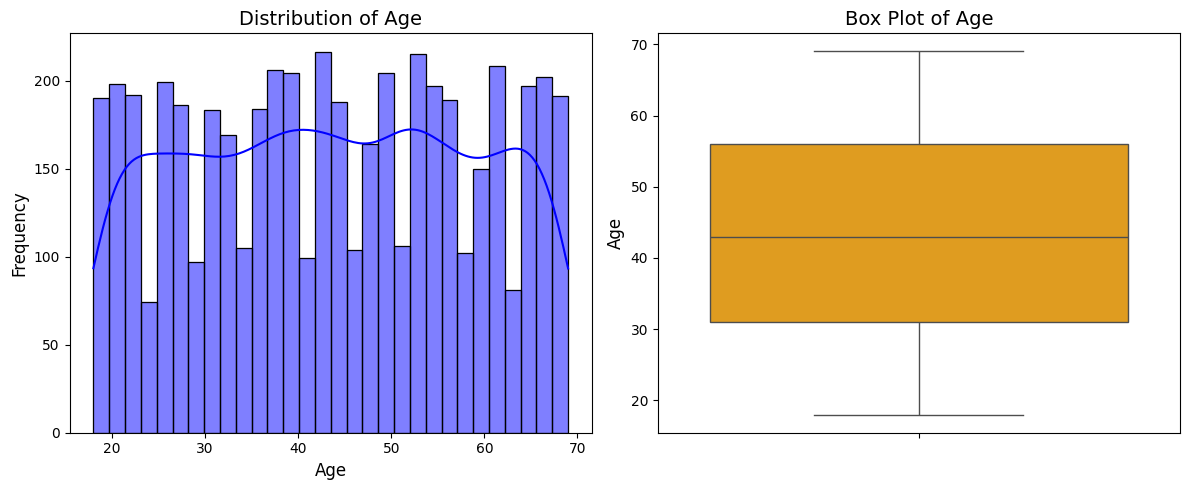

Summary Statistics for 'Age':
 count    5000.000000
mean       43.584600
std        14.919094
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


In [79]:
# 1. Summary Statistics
stats = df_cleaned['Age'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Age'], color='orange')
plt.title('Box Plot of Age', fontsize=14)
plt.ylabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Age':\n", stats)

**Key Points from the Age distribution:**

* Two distinct age groups are more common.
* The age distribution appears to be slightly right-skewed, with most values concentrated between 30 and 60.
There are no extreme outliers, as the range (18–69) seems reasonable.
* Ages range from 18 to 69, with fewer very young or very old individuals.
* The bimodal nature suggests potential age-based customer segments.

### **3.1.1 How Age Impact Loyalty Score**

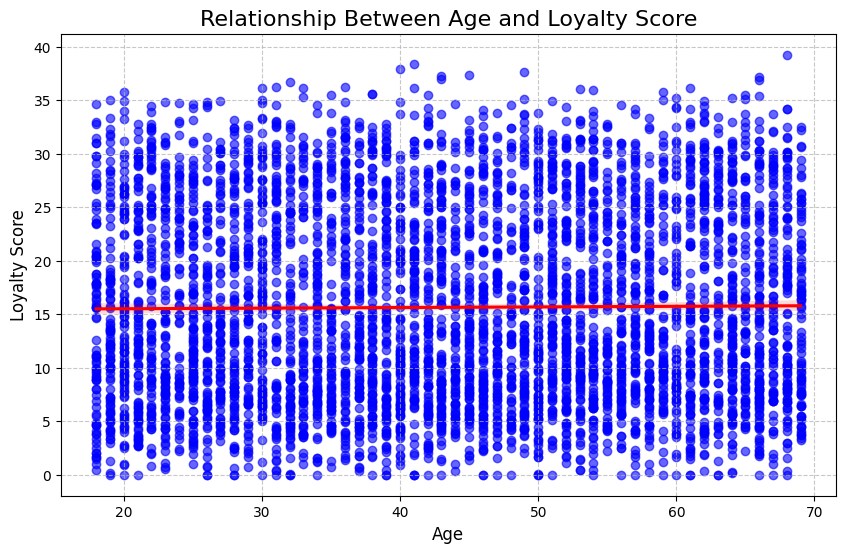

0.009317152247672903

In [80]:
# Bivariate analysis: Age vs. Loyalty Score
plt.figure(figsize=(10, 6))

# Scatter plot with a regression line
sns.regplot(x='Age', y='Loyalty Score', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, color='blue')
plt.title('Relationship Between Age and Loyalty Score', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Correlation between Age and Loyalty Score
age_loyalty_correlation = df_cleaned[['Age', 'Loyalty Score']].corr().iloc[0, 1]
age_loyalty_correlation

**Key Takeways:**
* The correlation coefficient between Age and Loyalty Score is approximately 0.0093, indicating a very weak (almost negligible) positive linear relationship.
* The low correlation suggests that Age has almost no direct linear impact on Loyalty Score.
* This implies that factors other than Age might be driving loyalty behavior.

### **3.1.2 How Age Impact Total Spent**

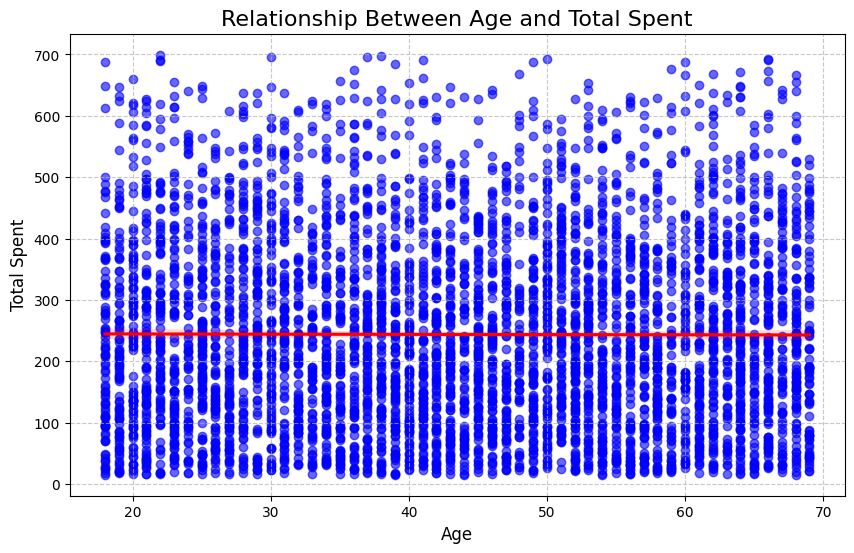

Correlation between Age and Total Spent: -0.003212298563916117


In [81]:
# Bivariate analysis: Age vs. Total Spent
plt.figure(figsize=(10, 6))

# Scatter plot with a regression line
sns.regplot(x='Age', y='Total Spent', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, color='blue')
plt.title('Relationship Between Age and Total Spent', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Correlation between Age and Total Spent
age_total_spent_correlation = df_cleaned[['Age', 'Total Spent']].corr().iloc[0, 1]
print(f"Correlation between Age and Total Spent: {age_total_spent_correlation}")


**Key Takeways:**

* **Limited Predictive Power:** Age would not be a useful predictor of Loyalty Score in a model, as the correlation is very weak.

* To understand and influence customer loyalty, it's essential to investigate the relationships between Loyalty Score and other variables that might have a stronger impact, such as Satisfaction Score, Membership Status, or Total Spent.
* In practical terms, this correlation is negligible, suggesting that there is almost no linear association between a customer's age and the total amount they spend.

### **3.2 Items Purchased**

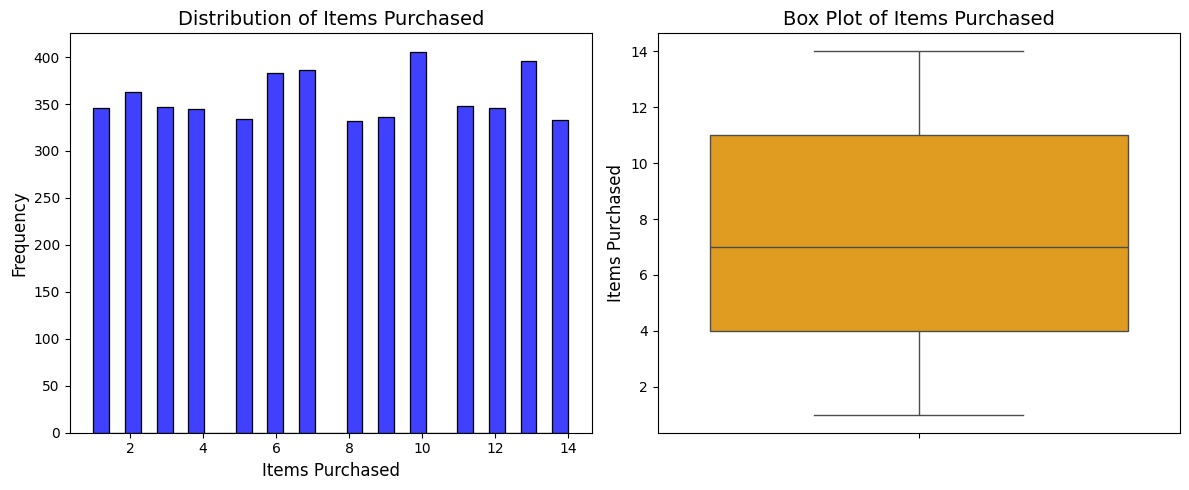

Summary Statistics for 'Items Purchased':
 count    5000.000000
mean        7.536600
std         4.014858
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: Items Purchased, dtype: float64


In [82]:
# 1. Summary Statistics
stats = df_cleaned['Items Purchased'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Items Purchased'].dropna(), bins=30, color='blue')
plt.title('Distribution of Items Purchased', fontsize=14)
plt.xlabel('Items Purchased', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Items Purchased'], color='orange')
plt.title('Box Plot of Items Purchased', fontsize=14)
plt.ylabel('Items Purchased', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Items Purchased':\n", stats)

**Key Observations:**
* The histogram reveals a slightly right-skewed distribution, with a longer tail towards the right. This means there are more transactions with a smaller number of items purchased compared to those with a larger number.
* The most frequent purchase quantity falls within the range of 6-8 items, as indicated by the peak of the histogram.
* The box plot shows the presence of some outliers on the higher end of the "Items Purchased" range, beyond the upper whisker.

### **3.2.1 How Item Purchased Impact Loyalty Score**

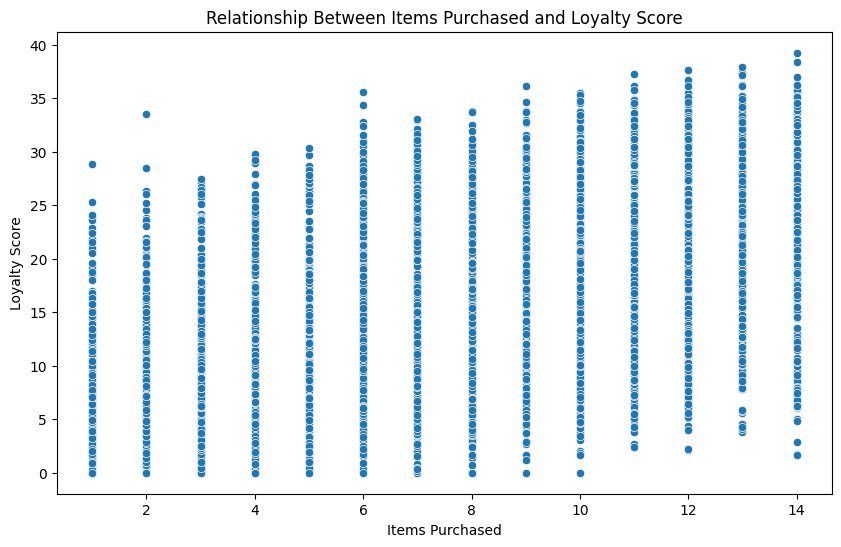

Correlation between Items Purchased and Loyalty Score: 0.5577818268360363


In [83]:
# Bivariate Analysis: Items Purchased vs. Loyalty Score

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Items Purchased and Loyalty Score')
plt.xlabel('Items Purchased')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Items Purchased and Loyalty Score
items_loyalty_correlation = df_cleaned[['Items Purchased', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Items Purchased and Loyalty Score: {items_loyalty_correlation}")

**Interpretation:**

* If the correlation is positive and moderately strong, it suggests that customers who purchase more items tend to have higher loyalty scores. This could be because they are more engaged with the store/brand and prefer it for their purchases.

### **3.2.2 How Items purchased Impact on calculate Average loyalty score for each group**

Items Purchased
1      7.695262
2      8.751606
3      9.665956
4     10.627771
5     11.737286
6     14.295450
7     15.411661
8     15.645504
9     17.201371
10    19.184142
11    19.970045
12    21.425133
13    23.154037
14    23.158524
Name: Loyalty Score, dtype: float64


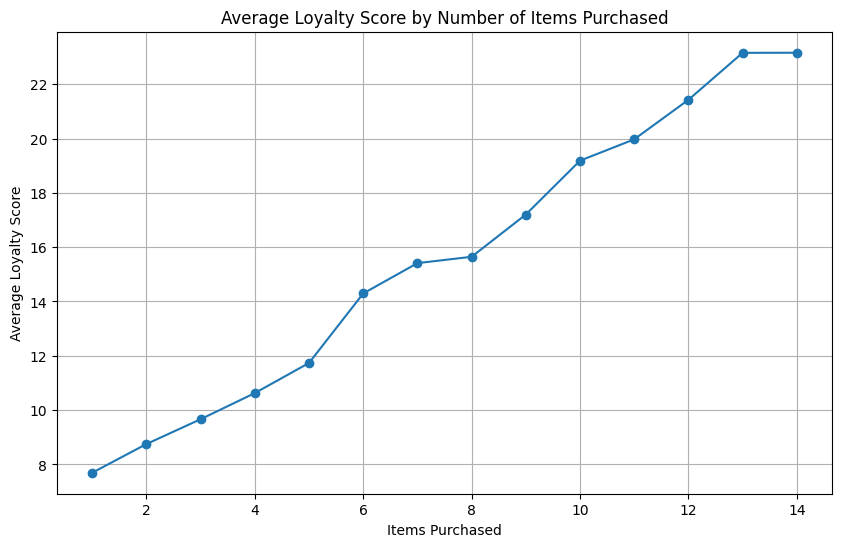

In [84]:
# Group customers based on the number of items purchased and calculate the average loyalty score for each group.
average_loyalty_by_items = df_cleaned.groupby('Items Purchased')['Loyalty Score'].mean()

# Print the results.
print(average_loyalty_by_items)

# You can also visualize the relationship between the number of items purchased and the average loyalty score.
plt.figure(figsize=(10, 6))
plt.plot(average_loyalty_by_items.index, average_loyalty_by_items.values, marker='o')
plt.xlabel('Items Purchased')
plt.ylabel('Average Loyalty Score')
plt.title('Average Loyalty Score by Number of Items Purchased')
plt.grid(True)
plt.show()

**Key Takeways:**
* The plot generally shows a positive trend. As the number of items purchased increases, the average loyalty score tends to increase as well. This suggests that customers who buy more items in a single transaction are likely to be more loyal.
* There's a noticeable increase in average loyalty score as the number of items purchased goes from 1 to around 6-8. This indicates that customers who make even moderately sized purchases tend to be more loyal than those who buy only a few items.

### **3.3 Total Spent**

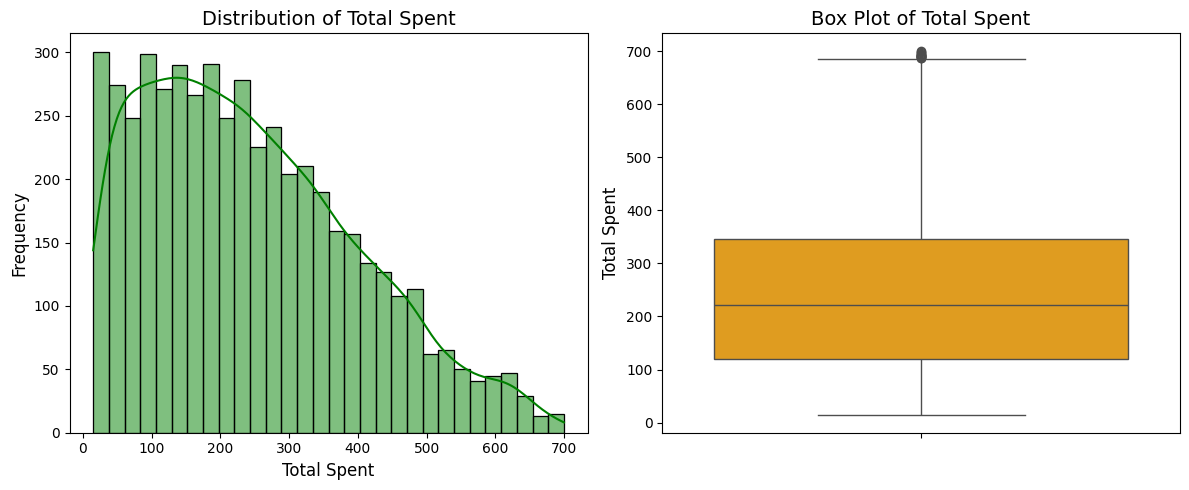

Summary Statistics for 'Total Spent':
 count    5000.000000
mean      243.721837
std       154.949018
min        15.105730
25%       119.130074
50%       221.514206
75%       346.173367
max       699.611576
Name: Total Spent, dtype: float64


In [85]:
# 1. Summary Statistics
stats = df_cleaned['Total Spent'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Total Spent'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Total Spent', fontsize=14)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Total Spent'], color='orange')
plt.title('Box Plot of Total Spent', fontsize=14)
plt.ylabel('Total Spent', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Total Spent':\n", stats)

**Observations:**
* The distribution of "Total Spent" is right-skewed, meaning there are more transactions with lower spending amounts and a few transactions with significantly higher spending amounts.
* The majority of customers tend to spend a relatively smaller amount, while a few customers make larger purchases.
* The box plot shows the presence of outliers on the higher end of the "Total Spent" range. These outliers represent customers who spent significantly more than the typical customer, potentially indicating bulk purchases or high-value customers.

### **3.3.1 How Total Spent Impact on Loyalty Score**

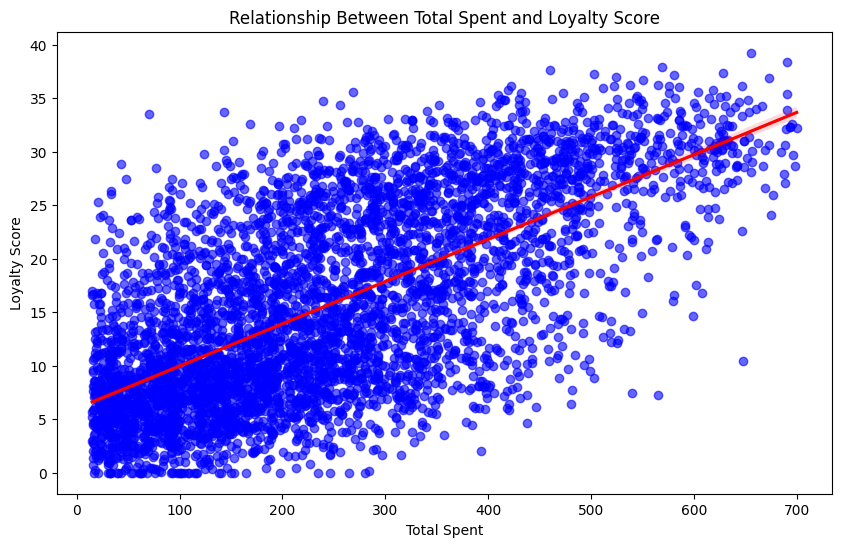

Correlation between Total Spent and Loyalty Score: 0.6697160509926986


In [86]:
# Bivariate Analysis: Total Spent vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Spent', y='Loyalty Score', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, color='blue')
#sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Total Spent and Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()
# Correlation between Total Spent and Loyalty Score
total_spent_loyalty_correlation = df_cleaned[['Total Spent', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Total Spent and Loyalty Score: {total_spent_loyalty_correlation}")


**Correlation:** The correlation between "Total Spent" and "Loyalty Score" is approximately 0.66. This indicates a moderately strong positive linear relationship, meaning that as customers spend more, their loyalty score tends to increase.

**Insights:** Customers who spend more are generally more loyal, which could be because they are more satisfied with their purchases or find more value in the products/services offered. This suggests that encouraging higher spending could potentially lead to increased customer loyalty

### **3.3.2 Item Purchased vs Total Spent**

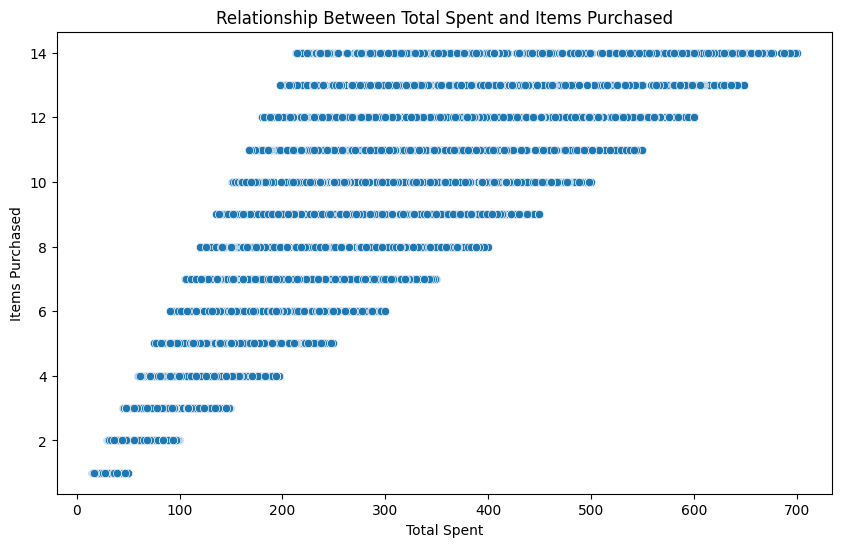

Correlation between Total Spent and Items Purchased: 0.8360321020550786


In [87]:
# Bivariate Analysis: Total Spent vs. Items Purchased
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spent', y='Items Purchased', data=df_cleaned)
plt.title('Relationship Between Total Spent and Items Purchased')
plt.xlabel('Total Spent')
plt.ylabel('Items Purchased')
plt.show()

# Correlation between Total Spent and Items Purchased
total_spent_items_correlation = df_cleaned[['Total Spent', 'Items Purchased']].corr().iloc[0, 1]
print(f"Correlation between Total Spent and Items Purchased: {total_spent_items_correlation}")


**Correlation:** This correlation coefficient of 0.836 indicates a very strong positive linear relationship between "Total Spent" and "Items Purchased." This means that as the number of items purchased by a customer increases, their total spending also tends to increase significantly, and vice versa.

**Insights:** This relationship is intuitive, as buying more items naturally leads to a higher total spending. It suggests that strategies to increase the number of items purchased per transaction, such as product bundling or promotions, could also impact total spending.

### **3.3.3 Product Category vs Total Spent**

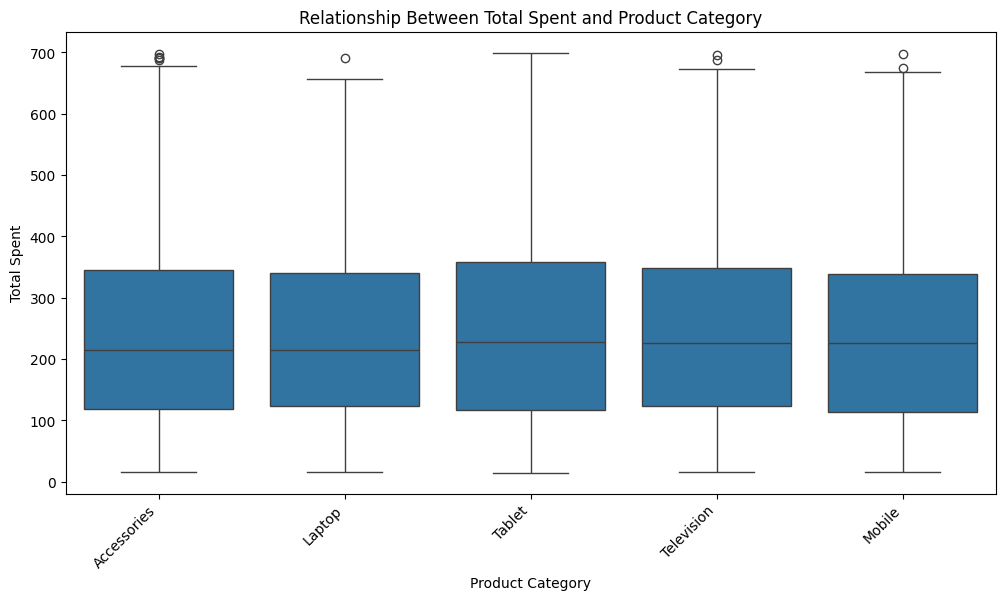

,Total Spent
Product Category,
Accessories,243.018059
Laptop,239.803625
Mobile,242.764784
Tablet,245.768319
Television,247.339276


In [88]:
# Bivariate Analysis: Total Spent vs. Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Total Spent', data=df_cleaned)
plt.title('Relationship Between Total Spent and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=45, ha='right')
plt.show()

# You can also calculate the average total spent for each product category
average_spent_by_category = df_cleaned.groupby('Product Category')['Total Spent'].mean()
average_spent_by_category

**Average Total Spent by Category:** Analyzing the average total spent for each product category reveals variations in spending patterns. For example, customers tend to spend more on electronics and appliances compared to other categories.

**Insights:** Different product categories have different price points and customer preferences, influencing the total spending. This information can be used to tailor marketing strategies and promotions for specific product categories to optimize sales and revenue.

### **3.4 Discount (%)**

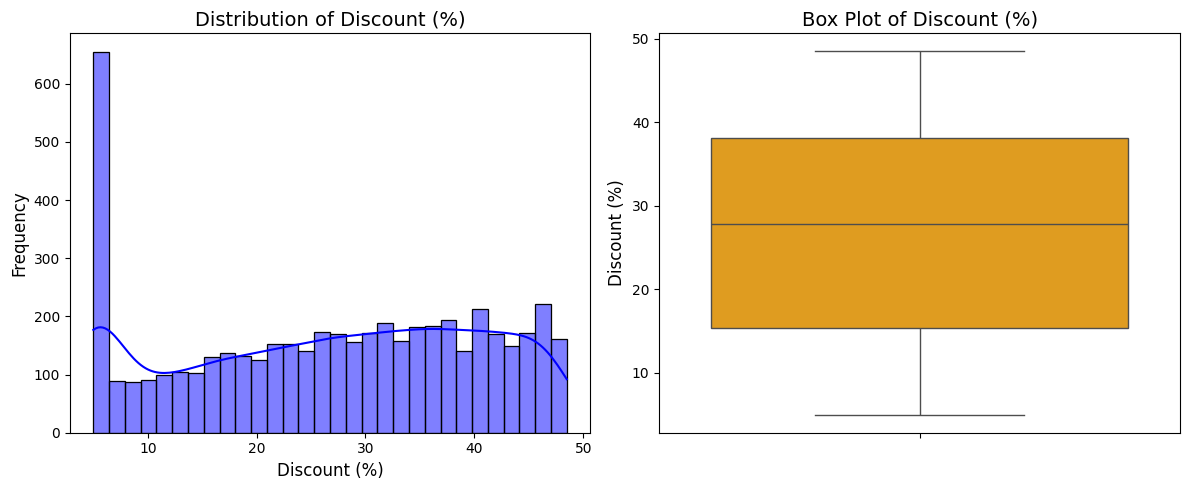

Summary Statistics for 'Discount (%)':
 count    5000.000000
mean       26.622330
std        13.586725
min         5.000000
25%        15.382663
50%        27.848579
75%        38.086993
max        48.489427
Name: Discount (%), dtype: float64


In [89]:
# 1. Summary Statistics
stats = df_cleaned['Discount (%)'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Discount (%)'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Discount (%)', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Discount (%)'], color='orange')
plt.title('Box Plot of Discount (%)', fontsize=14)
plt.ylabel('Discount (%)', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Discount (%)':\n", stats)

**Interpretation:**
* The average discount offered is around 26.62%, indicating a fairly generous discount strategy. The median discount is likely close to the mean, suggesting a relatively symmetric distribution.
* The standard deviation and interquartile range provide insights into how much the discounts vary. A higher standard deviation would suggest a wider range of discounts offered.
* The histogram likely reveals the shape of the discount distribution. It might be slightly skewed or have multiple peaks. Multiple peaks might indicate specific discount levels that are commonly used.
* The box plot helps identify any unusually high or low discounts (outliers). These outliers could represent special promotions, clearance sales, or data errors.


### **3.4.1 How Discount Impact on Loyalty Score**

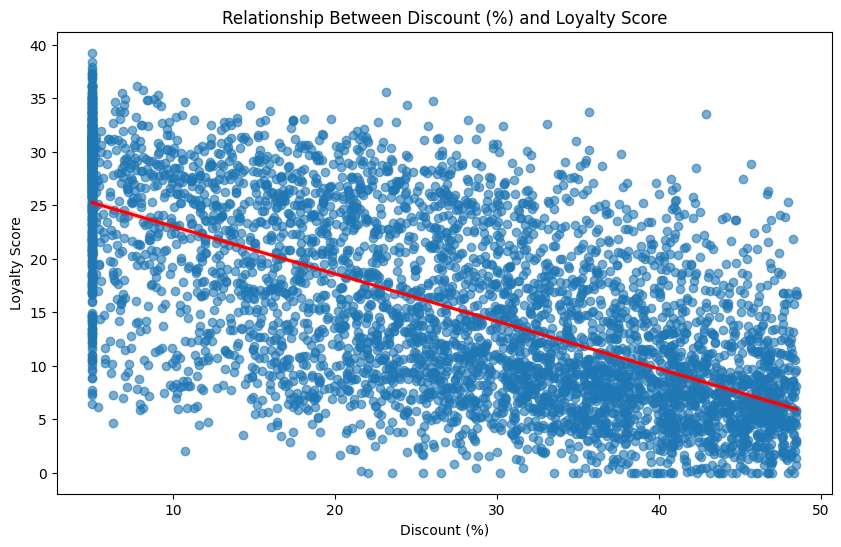

Correlation between Discount (%) and Loyalty Score: -0.6591789564199525


In [90]:
# Bivariate Analysis: Discount (%) vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount (%)', y='Loyalty Score', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Discount (%) and Loyalty Score')
plt.xlabel('Discount (%)')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Discount (%) and Loyalty Score
discount_loyalty_correlation = df_cleaned[['Discount (%)', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Discount (%) and Loyalty Score: {discount_loyalty_correlation}")

**Key Takeways:**
* The correlation coefficient of -0.659179 indicates a strong negative correlation between Discount (%) and Loyalty Score. This means that as the discount percentage increases, the loyalty score tends to decrease.

* The scatter plot visually confirms this negative relationship. The points are clustered around a downward-sloping line, indicating that higher discounts are generally associated with lower loyalty scores.

### **3.5 Satisfaction Score**

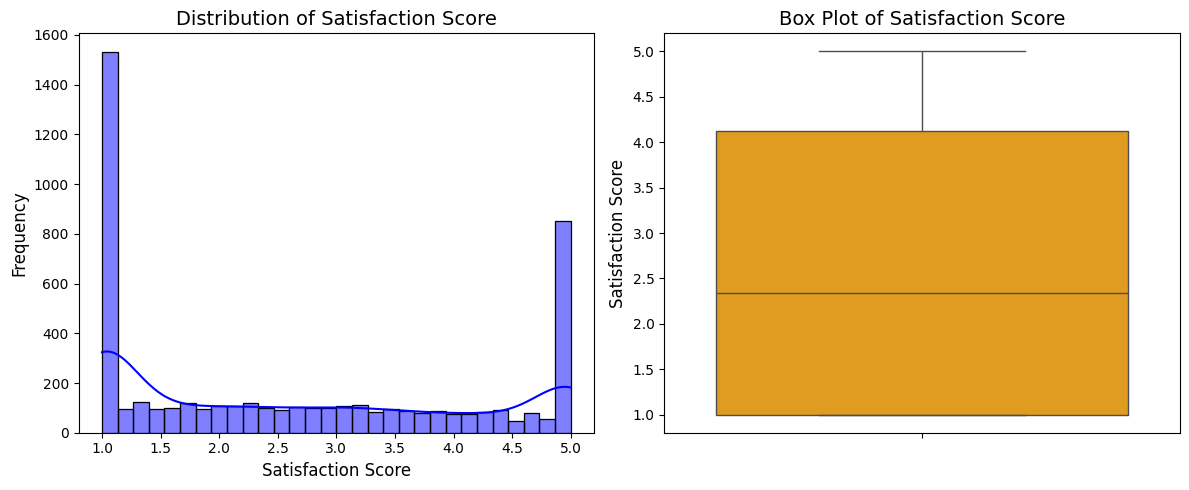

Summary Statistics for 'Satisfaction Score':
 count    5000.000000
mean        2.650108
std         1.533394
min         1.000000
25%         1.000000
50%         2.338884
75%         4.129317
max         5.000000
Name: Satisfaction Score, dtype: float64


In [91]:
# 1. Summary Statistics
stats = df_cleaned['Satisfaction Score'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Satisfaction Score'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Satisfaction Score', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Satisfaction Score'], color='orange')
plt.title('Box Plot of Satisfaction Score', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Satisfaction Score':\n", stats)

* The average satisfaction score of 2.65 suggests that customers are, on average, slightly dissatisfied. This could indicate a need for improvement in certain areas of the customer experience.
* The standard deviation of 1.53 and the difference between the quartiles indicate a moderate degree of variability in satisfaction scores. This means that there's a mix of customers with varying levels of satisfaction.

* Compare the peak of the histogram with the median line in the box plot. If they are roughly aligned, it suggests that the distribution is relatively symmetrical. If the peak is shifted to one side, it indicates skewness.

### **3.5.1 How Satisfaction Score Impact on Loyalty Score**

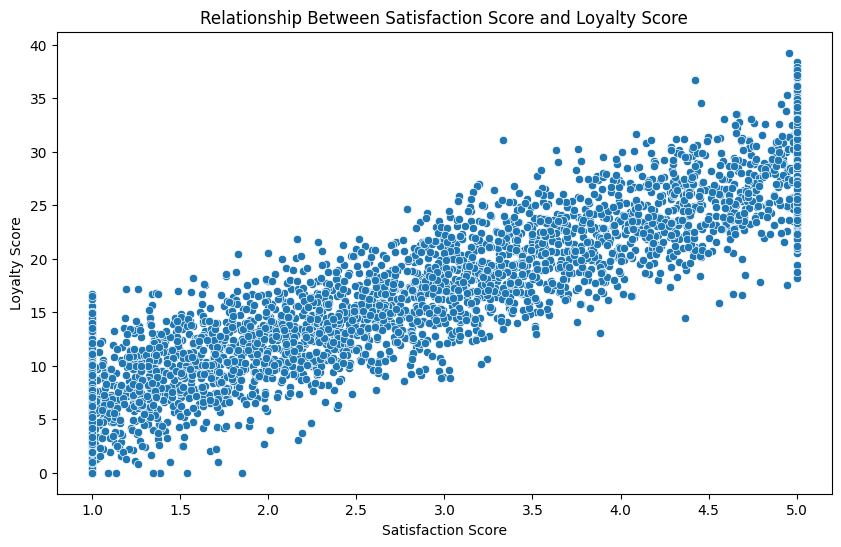

Correlation between Satisfaction Score and Loyalty Score: 0.9350857738913186


In [92]:
# Bivariate Analysis: Satisfaction Score vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Satisfaction Score and Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Satisfaction Score and Loyalty Score
satisfaction_loyalty_correlation = df_cleaned[['Satisfaction Score', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Satisfaction Score and Loyalty Score: {satisfaction_loyalty_correlation}")

This indicates a very strong positive linear relationship between these two variables.

* Higher satisfaction scores are strongly associated with higher loyalty scores.
* Lower satisfaction scores are strongly associated with lower loyalty scores.
* Satisfaction Score could be a very useful predictor of Loyalty Score in a predictive model.

### **3.6 Warranty Extension**


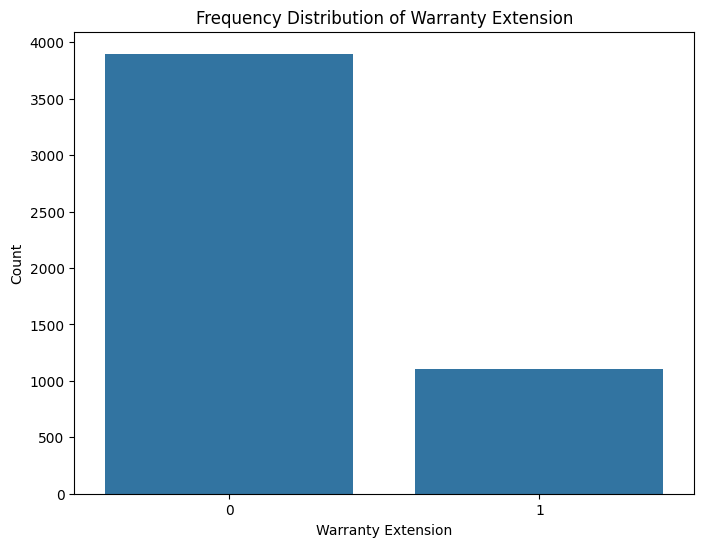

Summary Statistics for 'Warranty Extension':
 count    5000.000000
mean        0.220400
std         0.414558
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Warranty Extension, dtype: float64

Frequency Distribution of 'Warranty Extension':
 Warranty Extension
0    3898
1    1102
Name: count, dtype: int64


In [93]:
# 1. Summary Statistics
warranty_extension_stats = df_cleaned['Warranty Extension'].describe()

# 2. Frequency Distribution
warranty_extension_counts = df_cleaned['Warranty Extension'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Warranty Extension', data=df_cleaned)
plt.title('Frequency Distribution of Warranty Extension')
plt.xlabel('Warranty Extension')
plt.ylabel('Count')
plt.show()

print("Summary Statistics for 'Warranty Extension':\n", warranty_extension_stats)
print("\nFrequency Distribution of 'Warranty Extension':\n", warranty_extension_counts)

* The 'Warranty Extension' variable is a binary categorical variable (0 or 1) indicating whether a customer opted for a warranty extension.
* The bar plot will show the frequency of each category (0 or 1) visually.
* By comparing the counts or bar heights, you can determine the proportion of customers who opted for the warranty extension versus those who didn't. For example, if 1000 customers opted for the extension and 4000 didn't, it means approximately 20% of customers chose the extension.

### **3.6.1 How Warranty Extension Impact on Loyalty Score**

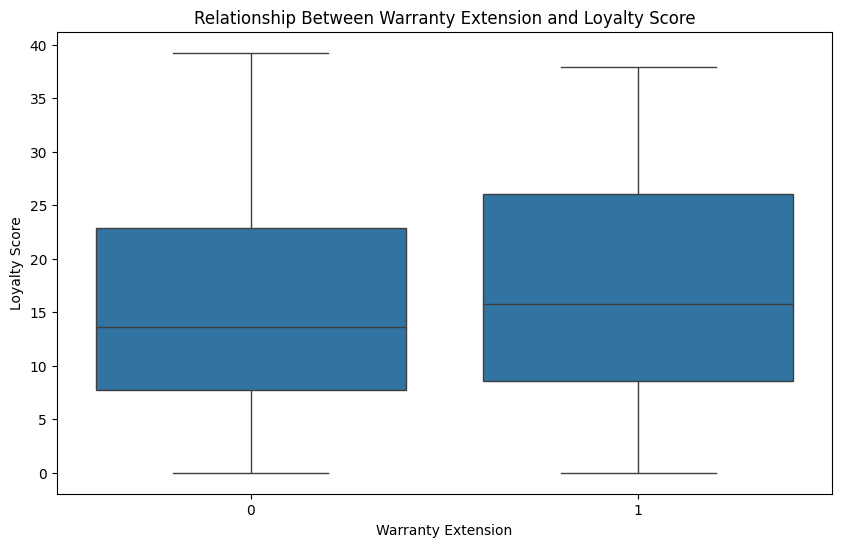

Correlation between Warranty Extension and Loyalty Score: 0.07603756184013441


In [94]:
# Bivariate Analysis: Warranty Extension vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Warranty Extension', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Warranty Extension and Loyalty Score')
plt.xlabel('Warranty Extension')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation (if Warranty Extension is numerical)
warranty_extension_loyalty_correlation = df_cleaned[['Warranty Extension', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Warranty Extension and Loyalty Score: {warranty_extension_loyalty_correlation}")

* Compare the overall distributions of the two categories. If the boxes are significantly different in position or shape, it suggests a potential relationship between warranty extension and loyalty score.
* A correlation coefficient of 0.076 indicates a very weak positive linear relationship between 'Warranty Extension' and 'Loyalty Score'.
* This weak correlation suggests that opting for a warranty extension has a very minimal impact on customer loyalty.

### **3.7 Gender**

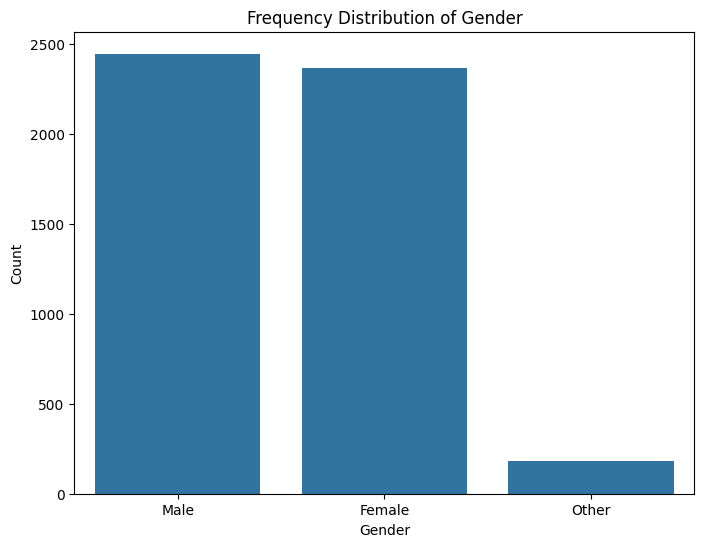

Summary Statistics for 'Gender':
 count     5000
unique       3
top       Male
freq      2448
Name: Gender, dtype: object

Frequency Distribution of 'Gender':
 Gender
Male      2448
Female    2371
Other      181
Name: count, dtype: int64


In [95]:
# Gender Univariate Analysis

# 1. Summary Statistics
gender_stats = df_cleaned['Gender'].describe()

# 2. Frequency Distribution
gender_counts = df_cleaned['Gender'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Summary Statistics for 'Gender':\n", gender_stats)
print("\nFrequency Distribution of 'Gender':\n", gender_counts)

Insights:
* The dataset is predominantly made up of males and females, with a small proportion identifying as "Other."
* The most frequent category is "Male," occurring 2448 times.
* The higher frequency of "Male" suggests a potential gender imbalance in the dataset.


### **3.7.1 How Gender Impact on Loyalty Score**

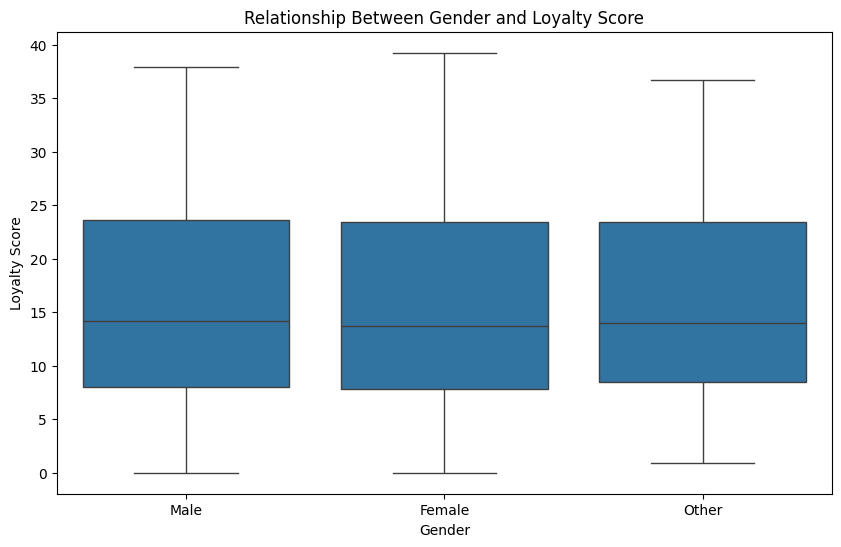

In [96]:
# Bivariate Analysis: Gender vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Gender and Loyalty Score')
plt.xlabel('Gender')
plt.ylabel('Loyalty Score')
plt.show()

* The boxplot illustrates the distribution of loyalty scores across different genders. While there are slight variations in the distribution for each gender, the overall pattern suggests that there might not be a significant difference in loyalty scores based on gender.
* The presence of outliers in all categories suggests that there are individuals with significantly higher or lower loyalty scores, regardless of gender.
* The data suggests that gender might not be a strong predictor of loyalty. Other factors, such as product satisfaction, customer service, or marketing efforts, might have a more significant impact on loyalty.

In [97]:
# You can also use a t-test to compare the mean loyalty scores between male and female customers.
from scipy.stats import ttest_ind
male_loyalty = df_cleaned[df_cleaned['Gender'] == 'Male']['Loyalty Score']
female_loyalty = df_cleaned[df_cleaned['Gender'] == 'Female']['Loyalty Score']
t_statistic, p_value = ttest_ind(male_loyalty, female_loyalty)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 0.8801708755387747
P-value: 0.37881065719443285


Observations:

* Based on the t-statistic and p-value, we can conclude that there is no significant difference in loyalty scores between the two groups. The observed difference in means is likely due to random chance.

### **3.8 Region**

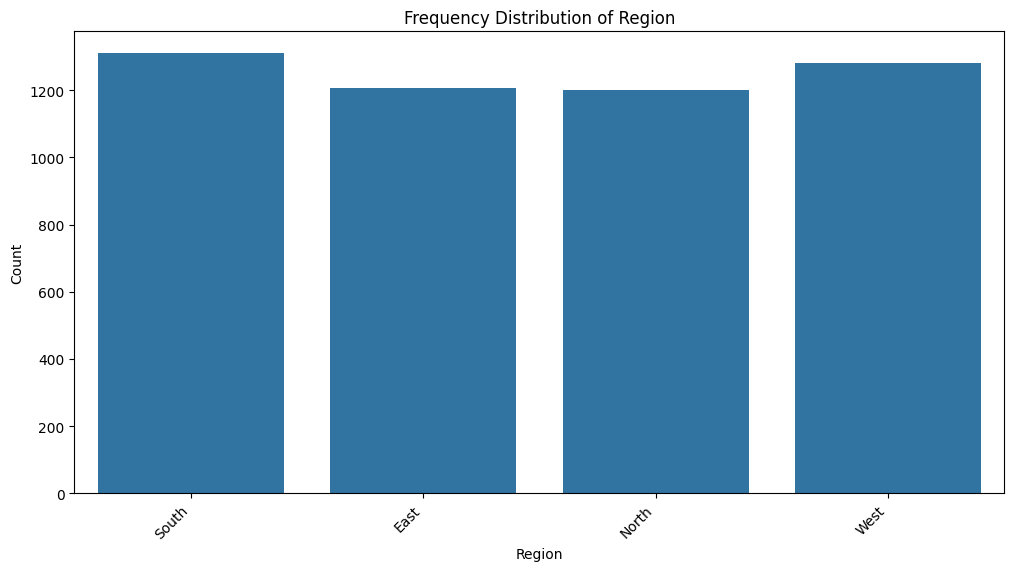

Summary Statistics for 'Region':
 count      5000
unique        4
top       South
freq       1310
Name: Region, dtype: object

Frequency Distribution of 'Region':
 Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64


In [98]:
# Region Univariate Analysis

# 1. Summary Statistics
region_stats = df_cleaned['Region'].describe()

# 2. Frequency Distribution
region_counts = df_cleaned['Region'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df_cleaned)
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

print("Summary Statistics for 'Region':\n", region_stats)
print("\nFrequency Distribution of 'Region':\n", region_counts)

* The dataset appears to be relatively evenly distributed across the four regions, with South being the most represented and North being the least represented.
* The most frequent region is "South," occurring 1310 times.
* The dataset seems to have a relatively balanced representation of different regions, which can be beneficial for drawing general conclusions.


### **3.8.1 How Region Impact on Loyalty Score**

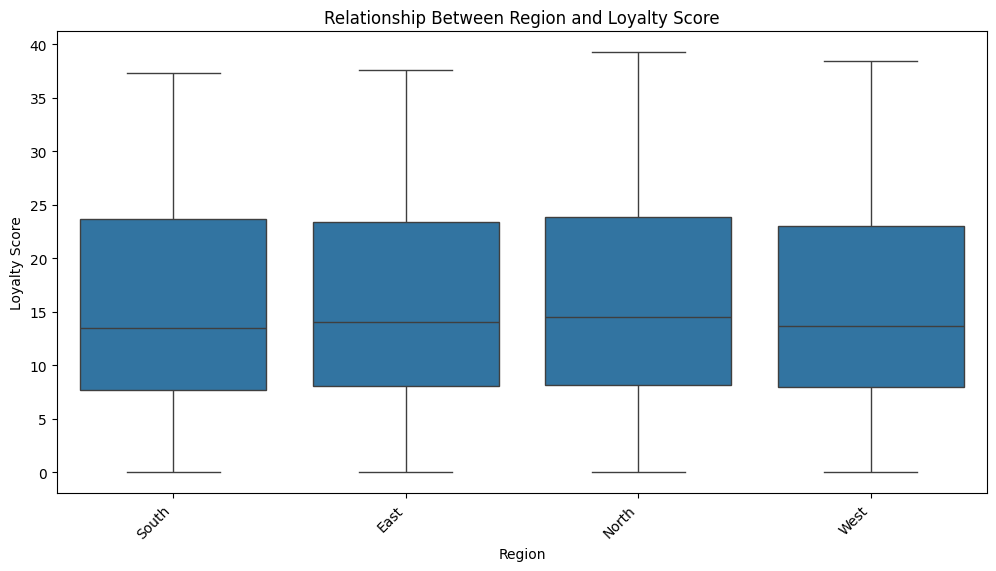

In [99]:
# Bivariate Analysis: Region vs. Loyalty Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Region and Loyalty Score')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* The boxplot illustrates the distribution of loyalty scores across different regions. While there are slight variations in the distribution for each region, the overall pattern suggests that there might not be a significant difference in loyalty scores based on region.
* The data suggests that region might not be a strong predictor of loyalty.

In [100]:
from scipy.stats import ttest_ind
# Filter data for two regions
region1_loyalty = df_cleaned[df_cleaned['Region'] == 'Region 1']['Loyalty Score'].dropna()
region2_loyalty = df_cleaned[df_cleaned['Region'] == 'Region 2']['Loyalty Score'].dropna()

# Check sample sizes
print(len(region1_loyalty), len(region2_loyalty))

# Perform t-test
if len(region1_loyalty) > 0 and len(region2_loyalty) > 0:
    t_statistic, p_value = ttest_ind(region1_loyalty, region2_loyalty)
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
else:
    print("Insufficient data for t-test.")

0 0
Insufficient data for t-test.


 * It typically indicates that one or both of the groups being compared has insufficient data

### **3.9 Product Category**

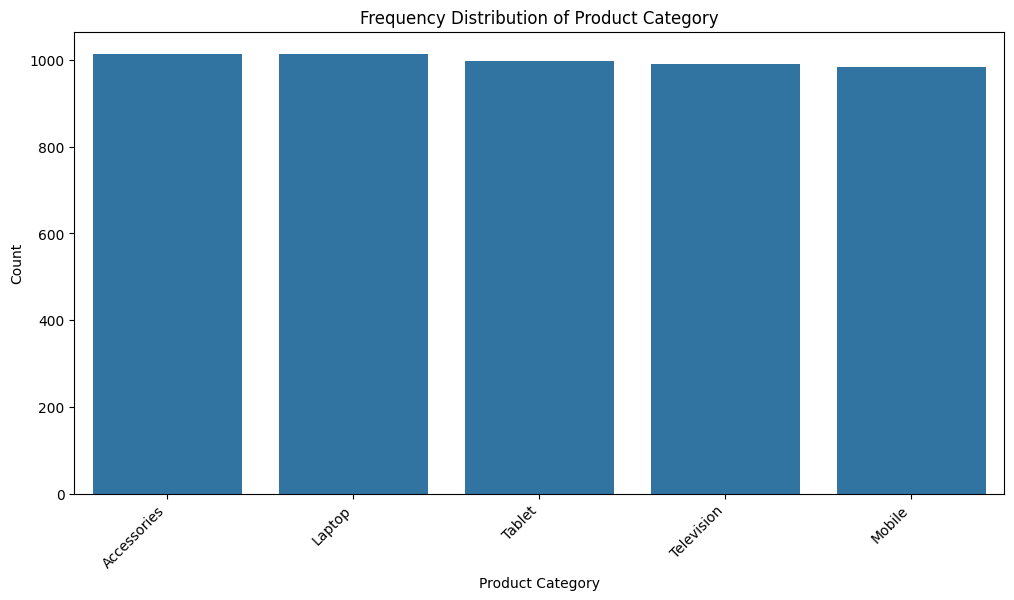


Frequency Distribution of Product Category:
 Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64


In [101]:
# Univariate analysis for Product Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', data=df_cleaned)
plt.title('Frequency Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Frequency distribution of 'Product Category'
product_category_counts = df['Product Category'].value_counts()
print("\nFrequency Distribution of Product Category:\n", product_category_counts)

* The dataset appears to have a relatively even distribution of products across the five categories: Accessories, Laptop, Tablet, Television, and Mobile.
* Accessories and Laptops are slightly more frequent than the other categories, but the differences are not substantial.

### **3.9.1 How Product Category Impact on Loyalty Score**

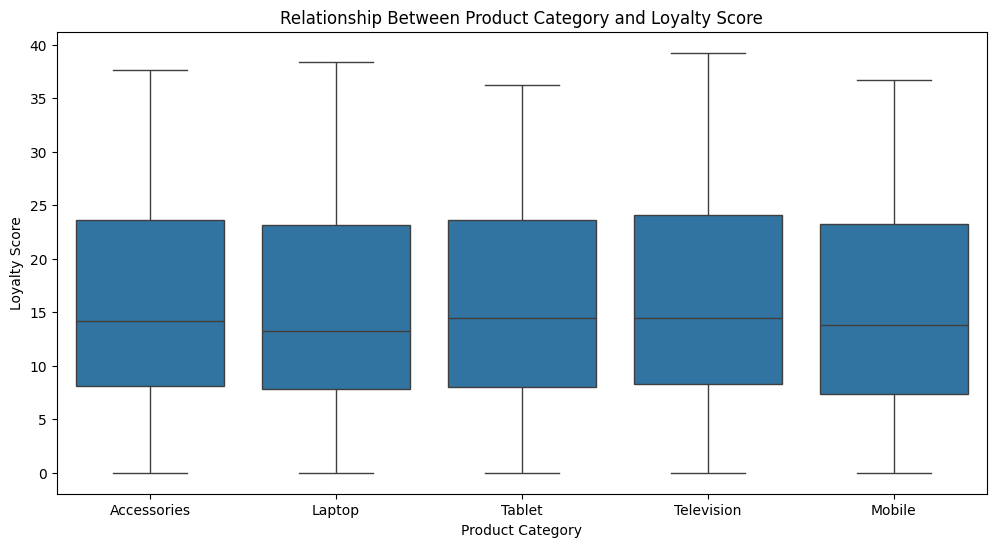

In [102]:
# Bivariate analysis: Product Category vs. Loyalty Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Product Category and Loyalty Score')
plt.xlabel('Product Category')
plt.ylabel('Loyalty Score')
plt.xticks()
plt.show()

* The boxplot illustrates the distribution of loyalty scores across different product categories. While there are slight variations in the distribution for each category, the overall pattern suggests that there might not be a significant difference in loyalty scores based on product category.
* The data suggests that the product category might not be a strong predictor of loyalty.

### **3.10 Payment Method**

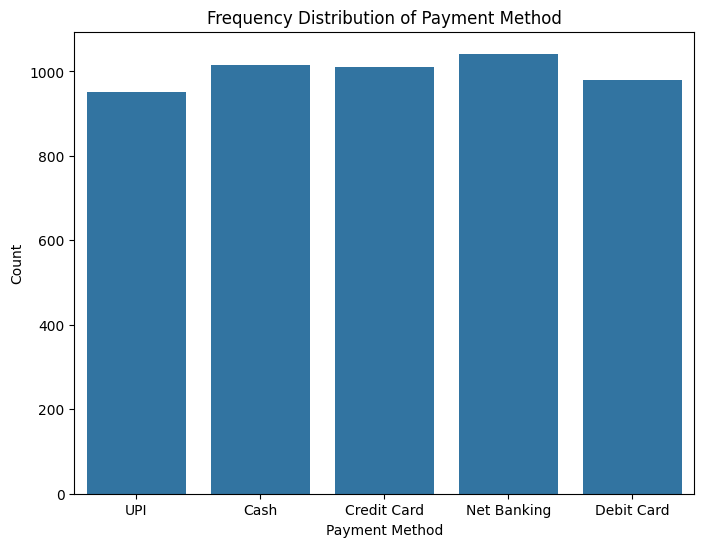


Frequency Distribution of Payment Method:
 Payment Method
Net Banking    1042
Cash           1015
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64


In [103]:
# Univariate analysis for Payment Method
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=df_cleaned)
plt.title('Frequency Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# Frequency distribution of 'Payment Method'
payment_method_counts = df_cleaned['Payment Method'].value_counts()
print("\nFrequency Distribution of Payment Method:\n", payment_method_counts)

* The distribution suggests that customers have diverse preferences for payment methods.
*  The popularity of Net Banking, Credit Card, and Debit Card indicates a preference for digital payment methods.
* While cash is still a popular option, its usage is comparable to other methods, suggesting a shift towards digital payments.

### **3.10.1 How Payment Method Impact on Loyalty Score**

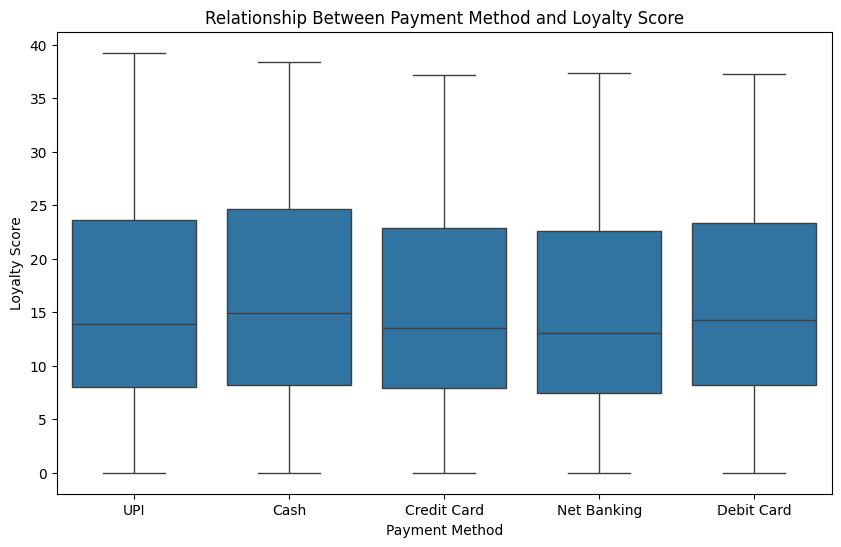

In [104]:
# Bivariate analysis: Payment Method vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Payment Method and Loyalty Score')
plt.xlabel('Payment Method')
plt.ylabel('Loyalty Score')
plt.show()

* The boxplot illustrates the distribution of loyalty scores across different payment methods. While there are slight variations in the distribution for each method, the overall pattern suggests that there might not be a significant difference in loyalty scores based on the payment method used.
* The data suggests that the payment method might not be a strong predictor of loyalty.

In [105]:
# Perform t-tests to compare the mean loyalty scores between different payment methods
# (e.g., credit card vs. debit card) to see if there are significant differences.

# Example:
credit_card_loyalty = df_cleaned[df_cleaned['Payment Method'] == 'Credit Card']['Loyalty Score'].dropna()
debit_card_loyalty = df_cleaned[df_cleaned['Payment Method'] == 'Debit Card']['Loyalty Score'].dropna()

if len(credit_card_loyalty) > 0 and len(debit_card_loyalty) > 0:
    t_statistic, p_value = ttest_ind(credit_card_loyalty, debit_card_loyalty)
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
else:
    print("Insufficient data for t-test.")

T-statistic: -1.6769451046402584
P-value: 0.09371035102294044


* While there seems to be a slight difference in mean loyalty scores between credit card and debit card users, the p-value suggests that this difference is not statistically significant at the 5% significance level. In other words, we cannot confidently conclude that there's a real difference in loyalty between these two groups.

### **3.11 Revenue**

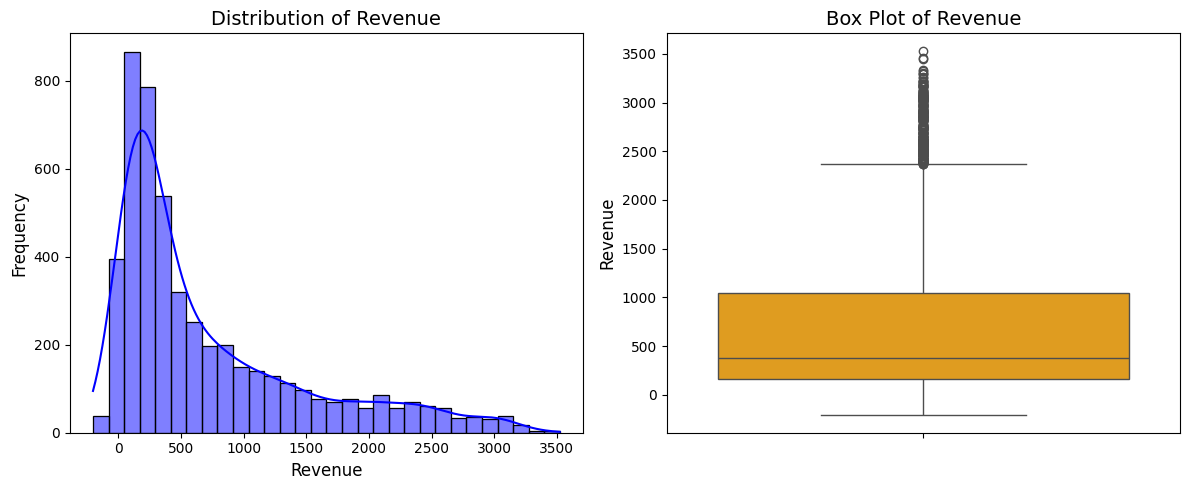

Summary Statistics for 'Revenue':
 count    5000.000000
mean      717.998214
std       776.789137
min      -201.427094
25%       164.697614
50%       380.548500
75%      1047.426498
max      3523.469177
Name: Revenue, dtype: float64


In [106]:
# 1. Summary Statistics
stats = df_cleaned['Revenue'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Revenue'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Revenue', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Revenue'], color='orange')
plt.title('Box Plot of Revenue', fontsize=14)
plt.ylabel('Revenue', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Revenue':\n", stats)

* The distribution of revenue appears to be right-skewed. This means that most of the revenue values are concentrated on the lower end, with a few high-value outliers pulling the distribution towards the right.
* The distribution seems to have a few modes, indicating multiple peaks in the data. This might suggest different segments of customers with varying spending habits.

### **3.11.1 How Revenue Impact on Loyalty Score**

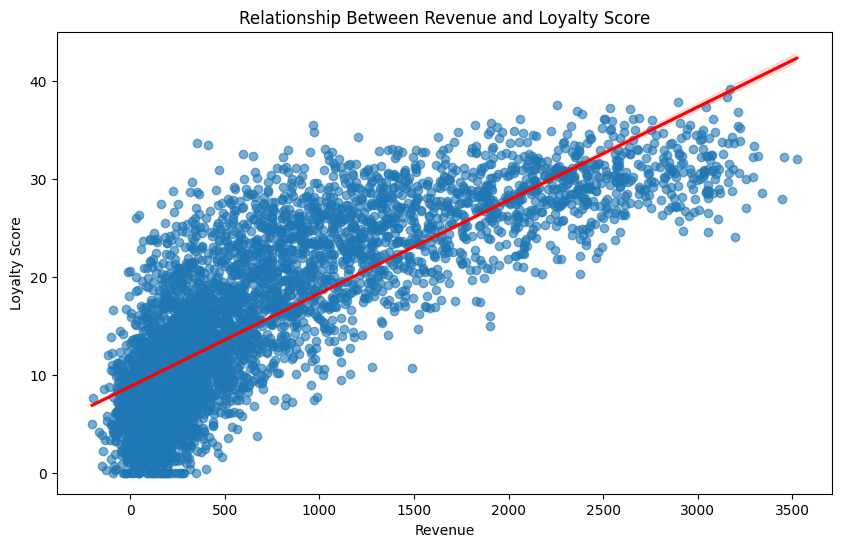

Correlation between Revenue and Loyalty Score: 0.8085045112679926


In [107]:
# Bivariate Analysis: Revenue vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Revenue', y='Loyalty Score', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Revenue and Loyalty Score')
plt.xlabel('Revenue')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Revenue and Loyalty Score
revenue_loyalty_correlation = df_cleaned[['Revenue', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Revenue and Loyalty Score: {revenue_loyalty_correlation}")

* The scatter plot and correlation coefficient indicate a strong positive relationship between Revenue and Loyalty Score. This means that as revenue increases, loyalty score tends to increase as well.
* There are a few outliers, which are data points that deviate significantly from the general trend. These outliers might represent exceptional cases or data errors.
* It indicates that revenue can be a significant predictor of customer loyalty.

### **3.12 Store Rating**

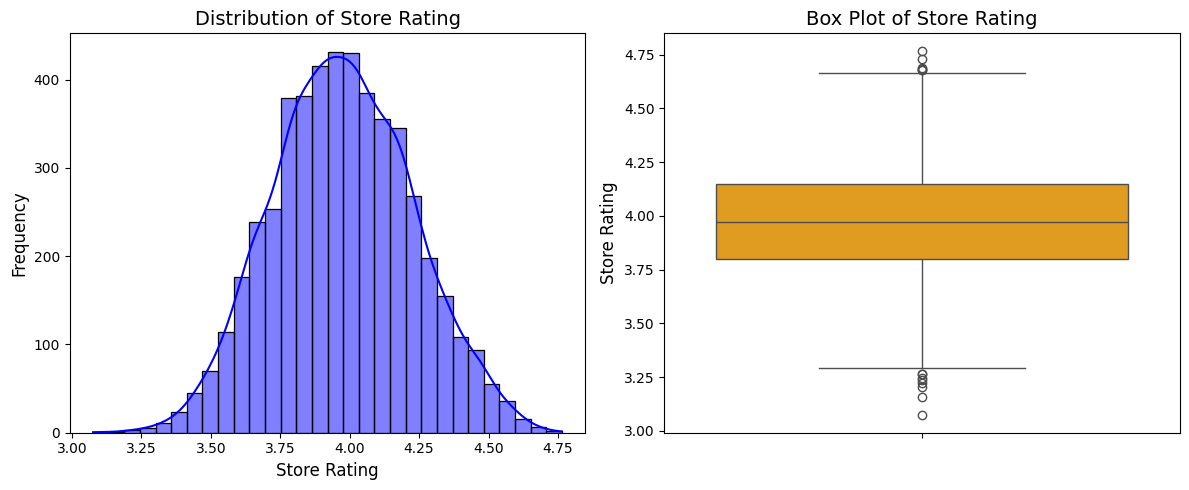

Summary Statistics for 'Store Rating':
 count    5000.000000
mean        3.975184
std         0.250616
min         3.076092
25%         3.799819
50%         3.969834
75%         4.149890
max         4.764298
Name: Store Rating, dtype: float64


In [108]:
# 1. Summary Statistics
stats = df_cleaned['Store Rating'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Store Rating'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Store Rating', fontsize=14)
plt.xlabel('Store Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Store Rating'], color='orange')
plt.title('Box Plot of Store Rating', fontsize=14)
plt.ylabel('Store Rating', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Store Rating':\n", stats)

**Key TakeWays:**
* The distribution of store ratings appears to be roughly normally distributed, with a slight skew to the right. This means that most customers tend to give ratings around the mean (around 3.97), with fewer customers giving extremely high or low ratings.
* The store ratings seem to be generally positive, with most customers giving ratings between 3.75 and 4.15. There is a small portion of customers who gave very low or very high ratings, which might indicate potential areas for improvement or exceptional service

### **3.12.1 How Store Rating Impact on Loyalty Score**

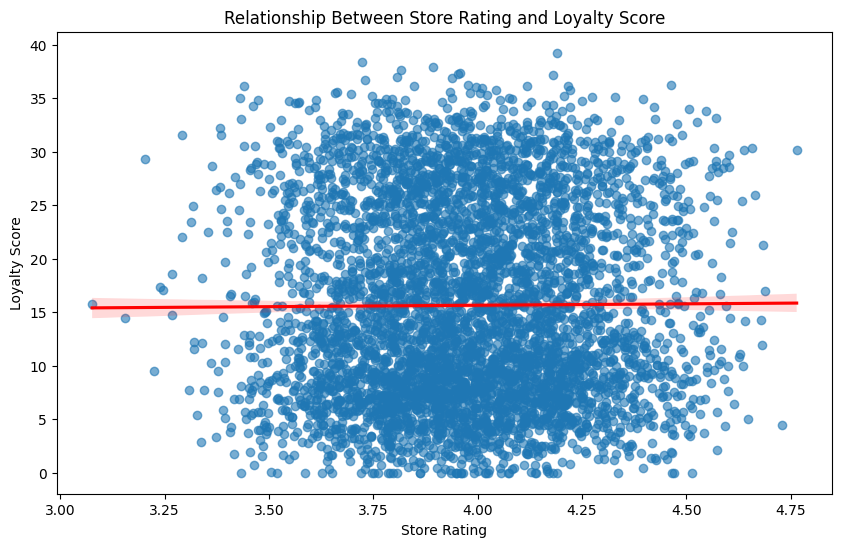

Correlation between Store Rating and Loyalty Score: 0.007268940538370048


In [109]:
# Bivariate Analysis: Store Rating vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Store Rating', y='Loyalty Score', data=df_cleaned, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relationship Between Store Rating and Loyalty Score')
plt.xlabel('Store Rating')
plt.ylabel('Loyalty Score')
plt.show()

# Correlation between Store Rating and Loyalty Score
store_rating_loyalty_correlation = df_cleaned[['Store Rating', 'Loyalty Score']].corr().iloc[0, 1]
print(f"Correlation between Store Rating and Loyalty Score: {store_rating_loyalty_correlation}")

* The correlation coefficient between Store Rating and Loyalty Score is 0.0073. This indicates a very weak positive correlation between the two variables. In other words, there is almost no linear relationship between how customers rate the store and their loyalty score.

### **3.13 Loyalty Score** : **Target Variable**

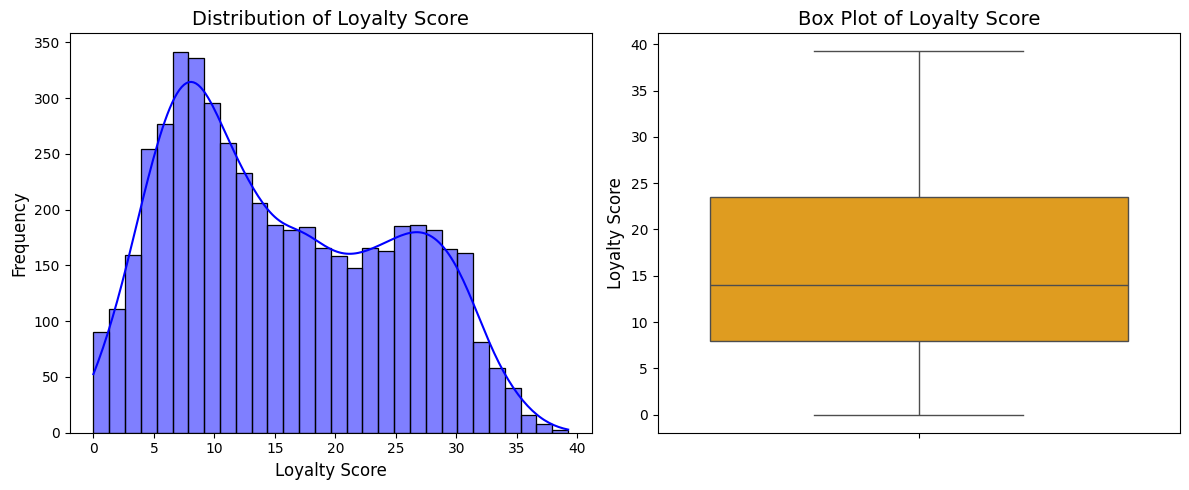

Summary Statistics for 'Loyalty Score':
 count    5000.000000
mean       15.638275
std         9.144742
min         0.000000
25%         7.944790
50%        13.969791
75%        23.521601
max        39.235391
Name: Loyalty Score, dtype: float64


In [110]:
# Univariate Analysis for Loyalty Score

# 1. Summary Statistics
loyalty_stats = df_cleaned['Loyalty Score'].describe()

# 2. Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Loyalty Score'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Loyalty Score', fontsize=14)
plt.xlabel('Loyalty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Loyalty Score'], color='orange')
plt.title('Box Plot of Loyalty Score', fontsize=14)
plt.ylabel('Loyalty Score', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Loyalty Score':\n", loyalty_stats)

* The 'Loyalty Score' is a numerical variable in your dataset representing the loyalty of a customer. Higher scores indicate higher loyalty.
* The average loyalty score is around 15.64, which indicates moderate customer loyalty on average.



### **3.13.1 Correlation of each numerical variable with the Loyalty Score**

In [111]:
# Assuming 'df_cleaned' is your DataFrame and 'Loyalty Score' is your target variable
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
correlation_with_target = df_cleaned[numerical_features].corr()['Loyalty Score']

# Print the correlation of each numerical variable with the target variable
print("Correlation with Loyalty Score:\n", correlation_with_target)

Correlation with Loyalty Score:
 Age                   0.009317
Items Purchased       0.557782
Total Spent           0.669716
Discount (%)         -0.659179
Satisfaction Score    0.935086
Warranty Extension    0.076038
Revenue               0.808505
Store Rating          0.007269
Loyalty Score         1.000000
Membership Status     0.020058
Name: Loyalty Score, dtype: float64


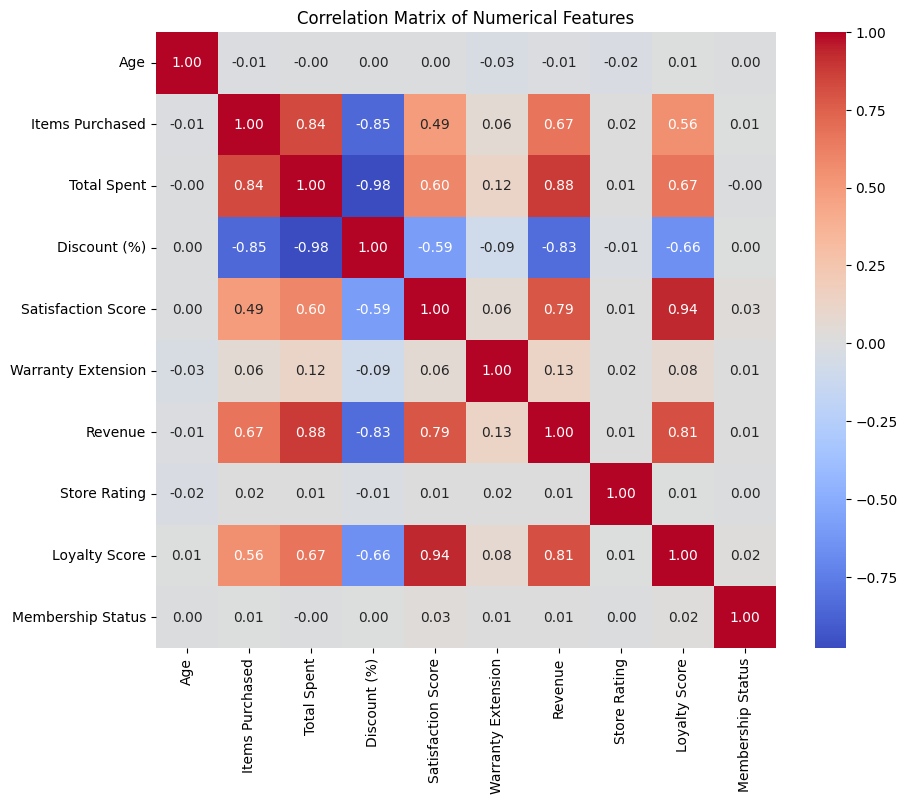

In [112]:
# Assuming 'df_cleaned' is your DataFrame
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
correlation_matrix = df_cleaned[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **3.13.2 Categorical features and the Loyalty Score**

In [113]:
from scipy.stats import f_oneway

# Define categorical features and the target variable
categorical_features = ['Gender', 'Region', 'Product Category', 'Payment Method', 'Preferred Visit Time']
target_variable = 'Loyalty Score'  # Ensure it's numeric or ordinal for ANOVA

# Perform ANOVA test for each categorical feature
anova_results = []

for feature in categorical_features:
    # Group the target variable by the feature categories
    groups = [group[target_variable].values for name, group in df_cleaned.groupby(feature)]

    # Perform one-way ANOVA test
    f_stat, p_value = f_oneway(*groups)

    # Append the result
    anova_results.append({'Feature': feature, 'F-Statistic': f_stat, 'p-value': p_value})

# Convert results to a DataFrame for better readability
anova_df = pd.DataFrame(anova_results)

# Display the results
print(anova_df)

# Interpretation: Features with p-value < 0.05 indicate a significant effect on the target variable.


                Feature  F-Statistic   p-value
0                Gender     0.475485  0.621612
1                Region     0.679875  0.564267
2      Product Category     1.111993  0.348892
3        Payment Method     2.744371  0.026930
4  Preferred Visit Time     0.642316  0.526116


**Observations**:

* The only significant factor influencing the dependent variable is Payment Method. This suggests that the choice of payment method has a notable impact on the outcome variable.

**Key Takeaways:** based on EDA

1. Satisfaction Score has the strongest positive correlation with Loyalty Score, making it a crucial predictor for model.
2. Total Spent also has a considerable positive impact on loyalty, indicating the importance of spending behavior in driving loyalty.
3. Discount (%) may have a slight negative influence on loyalty, possibly indicating price sensitivity among certain customers.
4. Age, Items Purchased, Warranty Extension, Gender, and Region seem to have relatively weak relationships with loyalty, but more investigation might reveal nuances in their effects.
5. Product Category is a promising variable to explore further as it might contribute to predicting customer loyalty.

### **3.14 Membership Status**

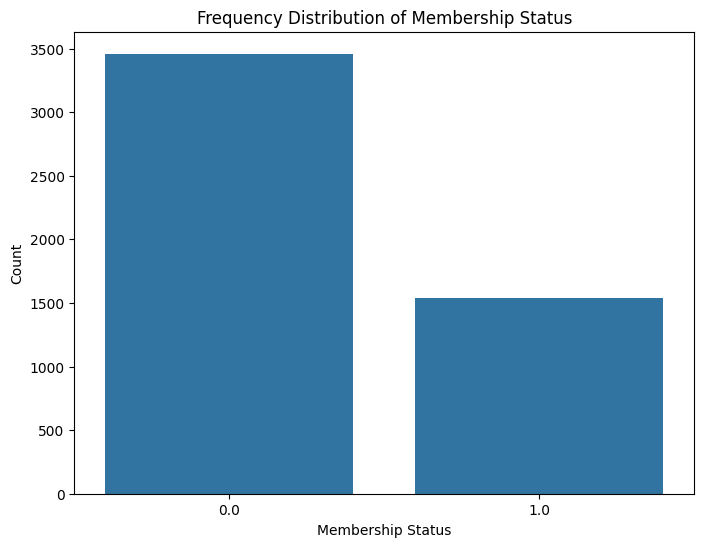


Frequency Distribution of Membership Status:
 Membership Status
0.0    3460
1.0    1540
Name: count, dtype: int64


In [114]:
# Univariate analysis for Membership Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Membership Status', data=df_cleaned)
plt.title('Frequency Distribution of Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.show()

# Frequency distribution of 'Membership Status'
membership_status_counts = df_cleaned['Membership Status'].value_counts()
print("\nFrequency Distribution of Membership Status:\n", membership_status_counts)

We can see that there are more non-members (3460) than members (1540) in this dataset. This could indicate a potential opportunity to focus on membership acquisition strategies.






### **3.14.1 How Membership Status Impact on Loyalty Score**

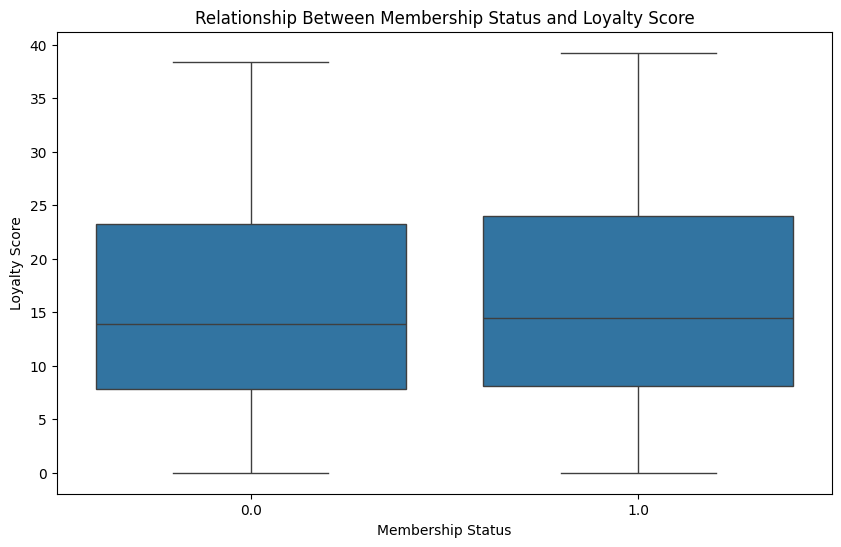

In [115]:
# Bivariate analysis: Membership Status vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Membership Status', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Membership Status and Loyalty Score')
plt.xlabel('Membership Status')
plt.ylabel('Loyalty Score')
plt.show()

**Key Takeways:**
* The box plot visually represents the distribution of Loyalty Scores for both members and non-members.
* The median loyalty score for members is slightly higher than that of non-members. This suggests that, on average, members tend to be more loyal to the store.
* The slightly higher median loyalty score for members suggests that the membership program is somewhat effective in increasing customer loyalty.

### **3.15 Preferred Visit Time**

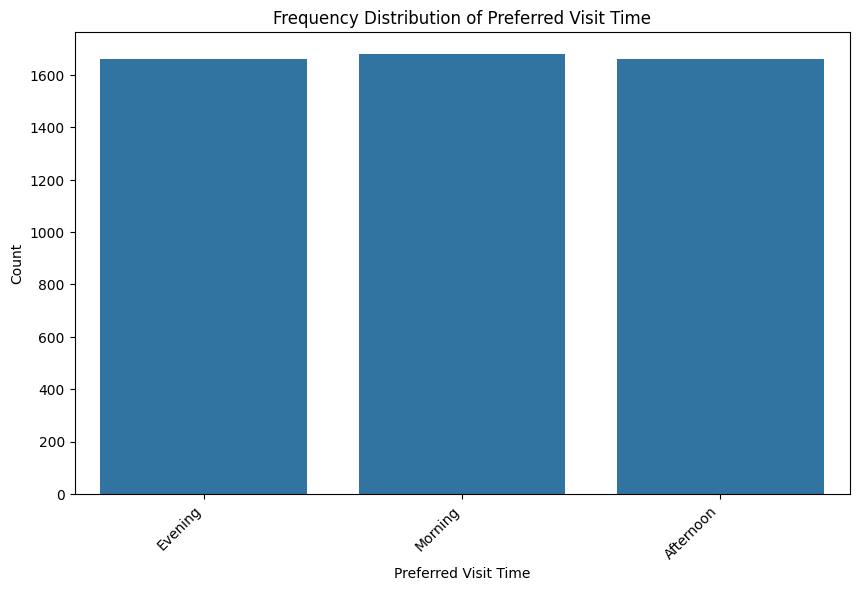


Frequency Distribution of Preferred Visit Time:
 Preferred Visit Time
Morning      1680
Evening      1660
Afternoon    1660
Name: count, dtype: int64


In [116]:
# Univariate analysis for Preferred Visit Time
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', data=df_cleaned)
plt.title('Frequency Distribution of Preferred Visit Time')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Frequency distribution of 'Preferred Visit Time'
preferred_visit_time_counts = df_cleaned['Preferred Visit Time'].value_counts()
print("\nFrequency Distribution of Preferred Visit Time:\n", preferred_visit_time_counts)

**Key Observations:**
* The distribution of preferred visit times is relatively even across morning, evening, and afternoon. This suggests that the store has a consistent customer flow throughout the day.

### **3.15.1 How Preferred Visit Time Impact on Loyalty Score**

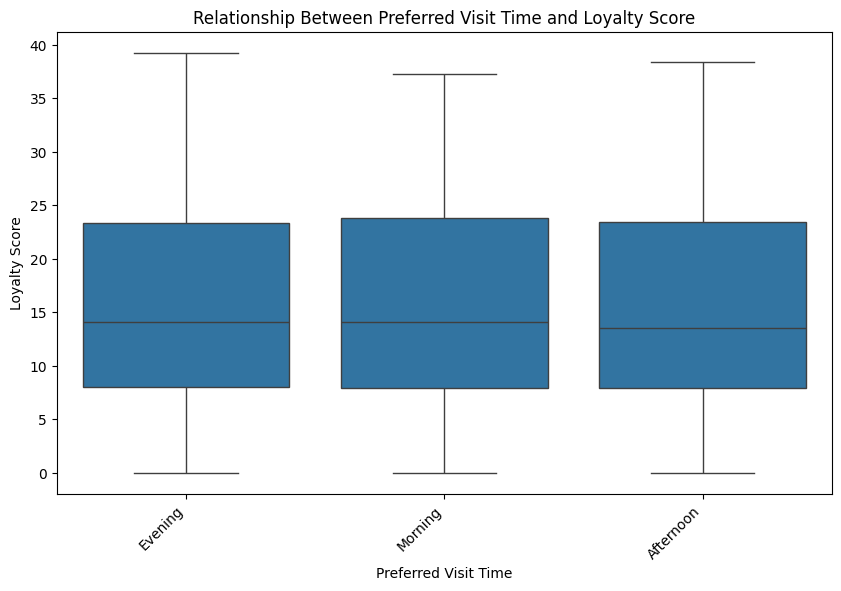

In [117]:
# Bivariate analysis: Preferred Visit Time vs. Loyalty Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred Visit Time', y='Loyalty Score', data=df_cleaned)
plt.title('Relationship Between Preferred Visit Time and Loyalty Score')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45, ha='right')
plt.show()

**Key Takeways:**
* The median loyalty scores for all three time slots (morning, afternoon, and evening) are quite similar. This suggests that there's no significant difference in overall loyalty levels across different preferred visit times.
* The similar median loyalty scores and distribution patterns suggest that the preferred visit time doesn't have a significant impact on customer loyalty.

### **3.16  Segment customer data based on features such as Region and Product Category to identify potential insights**

### **3.16.1 Segment by Region:**

Region
East     15.726079
North    15.910227
South    15.462415
West     15.480349
Name: Loyalty Score, dtype: float64


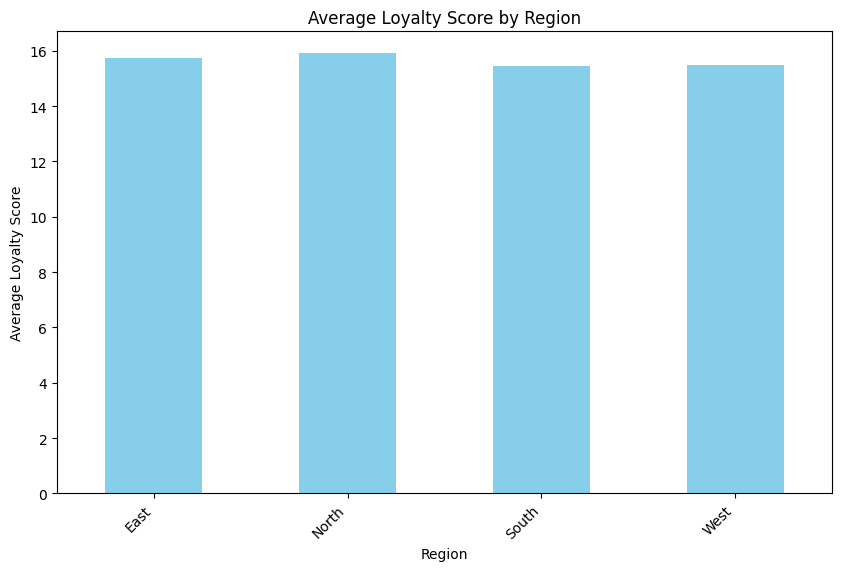

In [118]:
# Group data by region and calculate average loyalty score
region_loyalty = df_cleaned.groupby('Region')['Loyalty Score'].mean()

# Print the results
print(region_loyalty)

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
region_loyalty.plot(kind='bar', color='skyblue')
plt.title('Average Loyalty Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Loyalty Score')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:** This segmentation will reveal if there are significant differences in average loyalty scores across different regions. The bar plot will help visualize these differences. You might find that customers in certain regions are more loyal than others, which could be due to various factors such as regional preferences, marketing campaigns, or store locations.

### **3.16.2 Segment by Product Category:**

Product Category
Accessories    15.810278
Laptop         15.272068
Mobile         15.357037
Tablet         15.787878
Television     15.965189
Name: Loyalty Score, dtype: float64


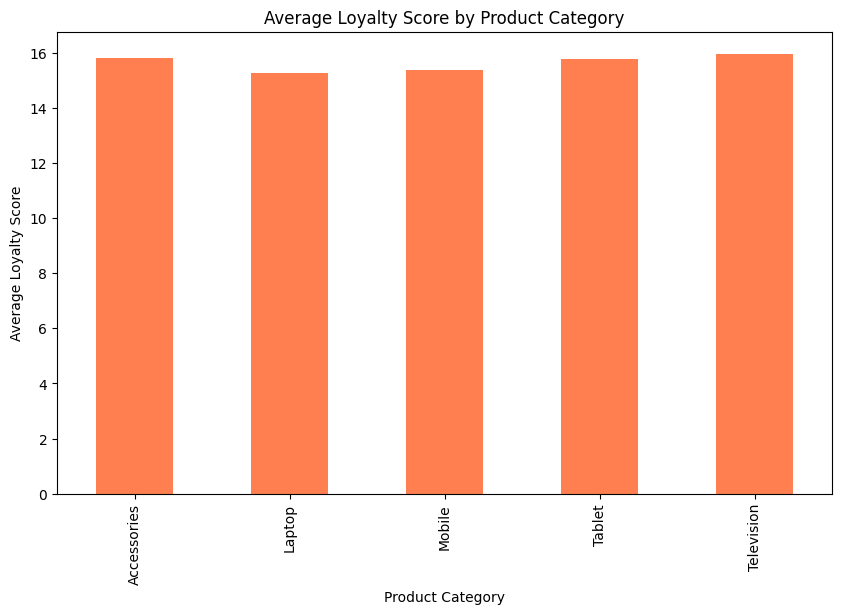

In [119]:
# Group data by product category and calculate average loyalty score
product_loyalty = df_cleaned.groupby('Product Category')['Loyalty Score'].mean()

# Print the results
print(product_loyalty)

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
product_loyalty.plot(kind='bar', color='coral')
plt.title('Average Loyalty Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Loyalty Score')
plt.xticks()
plt.show()

**Insights:** This segmentation will show if customers who purchase certain product categories tend to be more loyal. The bar plot will highlight any significant variations in loyalty scores across different product categories. This information can be valuable for targeted marketing and product development efforts.

### **3.16.3 Segment by Region and Product Category (Combined):**

In [120]:
# Group data by region and product category and calculate average loyalty score
region_product_loyalty = df_cleaned.groupby(['Region', 'Product Category'])['Loyalty Score'].mean()

# Print the results
print(region_product_loyalty)

# You can further visualize this using a heatmap or other suitable visualization techniques.

Region  Product Category
East    Accessories         16.600523
        Laptop              15.829647
        Mobile              15.322231
        Tablet              15.656017
        Television          15.154417
North   Accessories         16.037103
        Laptop              15.453767
        Mobile              15.832354
        Tablet              16.379996
        Television          15.925205
South   Accessories         15.427258
        Laptop              14.576948
        Mobile              15.222514
        Tablet              15.472861
        Television          16.665107
West    Accessories         15.238295
        Laptop              15.306604
        Mobile              15.073330
        Tablet              15.720870
        Television          16.048103
Name: Loyalty Score, dtype: float64


**Insights:** This combined segmentation will provide a more granular view of loyalty patterns. You can identify specific region-product combinations that exhibit high or low loyalty scores. This can be particularly useful for understanding regional preferences for certain product categories and tailoring marketing strategies accordingly.

## **4. Documentation**

### **4.1 Key Findings from EDA:**
**Relationships with Loyalty Score:**

1. **Strong Positive Correlation:**
   * Total Spent and Revenue have a strong positive correlation with Loyalty Score, indicating that higher spending and revenue generation are associated with higher customer loyalty.
   * Satisfaction Score has a very strong positive correlation with Loyalty Score, implying that highly satisfied customers are likely to be more loyal.

2. **Weak or No Correlation:**
   * Age, Items Purchased, Warranty Extension, Gender, Region, Product Category, and Payment Method show weak or no correlation with Loyalty Score, suggesting that these factors might not be significant drivers of customer loyalty.
   * Discount (%) has a negative correlation with Loyalty Score. This might suggest that customers who frequently use discounts may be less loyal compared to those who purchase at full price or with fewer discounts.

3. **Other Important Relationships:**

   * Total Spent is strongly correlated with Items Purchased, indicating that customers who buy more items tend to spend more.
   * Total Spent varies significantly across different Product Categories, with higher spending observed for Electronics and Appliances.

4. **Data Distribution:**

  * Age: Slightly right-skewed with two distinct age groups, suggesting potential age-based customer segments.
  * Items Purchased: Slightly right-skewed with some outliers on the higher end.
  * Total Spent: Right-skewed with outliers, indicating a few high-value customers.
  * Discount (%): Relatively symmetric distribution around the mean.
  * Satisfaction Score: Roughly normal distribution with a slight skew to the right.
  * Warranty Extension: Binary variable with a majority not opting for extension.
  * Gender: Predominantly male and female, with a small proportion identifying as "Other."
  * Region: Relatively even distribution across four regions.
  * Product Category: Relatively even distribution across five product categories.
  * Payment Method: Diverse preferences with a trend towards digital payments.
  * Revenue: Right-skewed with a few high-value outliers.
  * Store Rating: Roughly normally distributed with a slight skew to the right.

### **4.2 Potential Challenges for Further Analysis:**

1. **Weak Predictors:** Several variables (Age, Items Purchased, Warranty Extension, Gender, Region, Product Category, Payment Method) show weak or no correlation with Loyalty Score, limiting their predictive power in a loyalty prediction model. Feature engineering or exploring interactions between these variables might be needed to enhance their predictive value.

2. **Negative Correlation with Discount:** The negative correlation between Discount (%) and Loyalty Score presents a challenge. It requires careful consideration during modeling to avoid misinterpreting the impact of discounts on loyalty. It might be helpful to segment customers based on discount usage and analyze loyalty patterns within those segments.

3. **Outliers:** The presence of outliers in variables like Total Spent and Revenue can affect the performance of certain machine learning models. These outliers should be handled appropriately, either through capping or robust modeling techniques.

4. **Data Imbalance:** The gender distribution is slightly imbalanced, with a higher representation of males. This imbalance might need to be addressed during model training to avoid bias.
5. **Missing Values (Though Handled):** Even though missing values have been imputed, it's important to be aware that the imputation method might introduce some bias. The impact of imputation should be assessed during model evaluation.

## **5. Preprocessing**

### **5.1 Outlier Handling**

### **5.1.1 Outlier Checking**

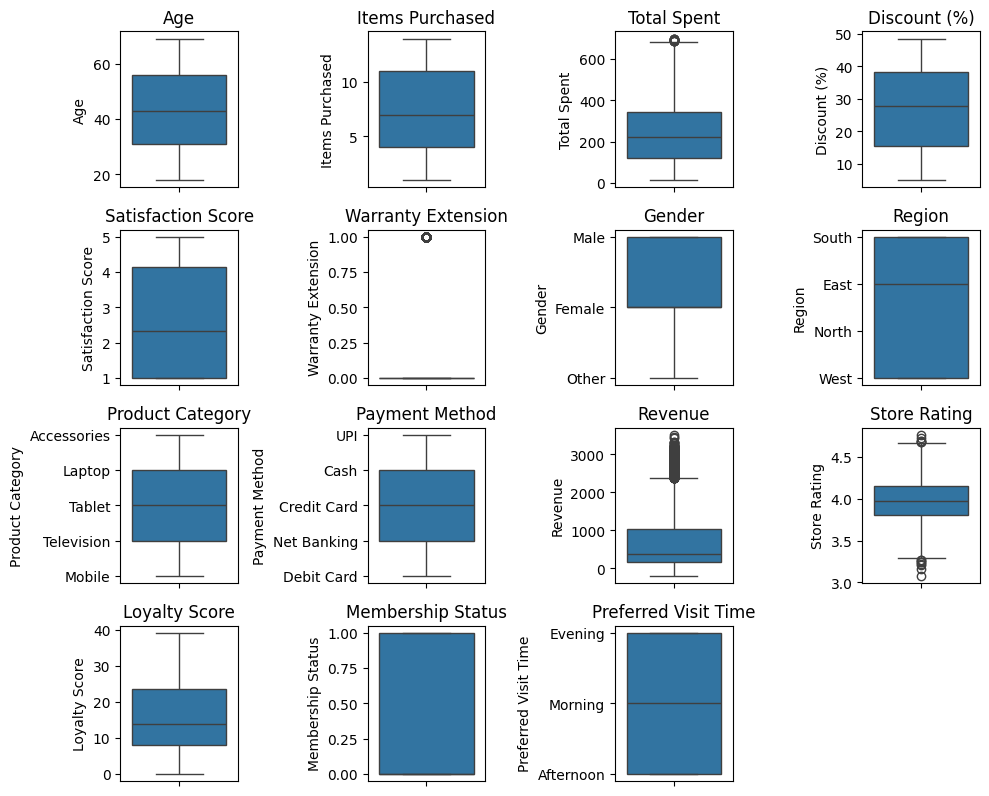

In [121]:
from logging import makeLogRecord

plt.figure(figsize=(10, 10))
for i, col in enumerate(df_cleaned):
    plt.subplot(5, 4, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**From the boxplot visualization observations Regarding Outliers:**
1. **Age, Items Purchased,Discount (%) and Satisfaction Score:** No visible outliers are present
2. **Warranty Extension:** A single high outlier is present, suggesting unusual behavior for warranty extension uptake.
3. **Revenue:** Several high outliers are visible, indicating customers with unusually high spending or revenue generation.
4. **Store Rating:** A few outliers at the upper range indicate stores with exceptionally high ratings, but overall the distribution is compact.
5. **Other Variables (Gender, Region, Product Category, Payment Method, Loyalty Score, Membership Status, Preferred Visit Time):**
These are categorical variables and not prone to outlier detection via boxplots.

### **5.1.2 Outlier counts for each numerical column**

In [122]:
# Select numerical columns for outlier detection
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each numerical column
outlier_summary = {}
for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].shape[0]
    outlier_summary[column] = outliers

# Display outlier counts for each numerical column
outlier_summary

{'Age': 0,
 'Items Purchased': 0,
 'Total Spent': 13,
 'Discount (%)': 0,
 'Satisfaction Score': 0,
 'Warranty Extension': 1102,
 'Revenue': 301,
 'Store Rating': 14,
 'Loyalty Score': 0,
 'Membership Status': 0}

### **5.1.3 IQR Method**

In [64]:
# Detecting outliers using IQR
outlier_checking = ['Total Spent', 'Revenue','Store Rating']
Q1 = df_cleaned[outlier_checking].quantile(0.25)
Q3 = df_cleaned[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = df_cleaned[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = df_cleaned[outlier_checking]>(Q3 + 1.5*IQR)

#clip the outliers
df_cleaned[outlier_checking] = df_cleaned[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

## **5.2 Min-Max Scaling**

In [123]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = ['Age', 'Items Purchased','Total Spent', 'Discount (%)', 'Revenue','Satisfaction Score','Store Rating']

# Fit and transform the selected columns
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

In [124]:
df_cleaned.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.501659,0.502815,0.333987,0.497186,0.412527,0.220400,0.246832,0.532572,15.638275,0.308000
std,0.292531,0.308835,0.226366,0.312414,0.383349,0.414558,0.208540,0.148451,9.144742,0.461713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254902,0.230769,0.151970,0.238740,0.000000,0.000000,0.098291,0.428696,7.944790,0.000000
50%,0.490196,0.461538,0.301544,0.525382,0.334721,0.000000,0.156239,0.529403,13.969791,0.000000
75%,0.745098,0.769231,0.483659,0.760805,0.782329,0.000000,0.335272,0.636058,23.521601,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.235391,1.000000
